In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python --version

Python 3.7.12


##Membuat dataframe

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Day 17 Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.shape

(7043, 21)

Terdapat 7043 baris observasi dan 21 kolom variabel dalam dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Terdapat kesalahan dimana kolom TotalCharges seharusnya masuk ke dalam kolom data numerik namun terbaca ke dalam tipe data string. Akan dilakukan pemeriksaan lebih lanjut ketika melakukan basic cleansing

##Basic data cleansing

###Memeriksa apakah terdapat duplikasi baris pada data

In [ ]:
df.duplicated().sum()

0

Memeriksa duplikasi baris dengan mengecek kolom customerID

In [ ]:
df['customerID_check'] = df.duplicated(subset='customerID')
id_check = 0
for i in df['customerID_check']: 
  if (i == True):
    id_check += 1
  else:
    continue
id_check

0

Dari hasil di atas dapat diketahui tidak terdapat baris yang duplikat dalam data

###Memeriksa apakah terdapat missing value pada data

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
customerID_check    0
dtype: int64

Dari hasil di atas diketahui bahwa tidak terdapat missing value jika menggunakan metode .isnull. Namun setelah melakukan skimming pada file csv, ditemukan adanya whitespace di dalam kolom TotalCharges yang tidak terdeteksi oleh code .isnull

In [ ]:
import string
df[df.isin(list(string.whitespace))].count().sum()

11

Terdapat 11 whitespace dalam data, sehingga perlu dilakukan treatment dengan menghapus baris yang memiliki whitespace

In [ ]:
df_clean = df[df['TotalCharges'].apply(lambda x: True if len(x.split()) == 1 else False)]
df_clean.reset_index(drop=True)

df_clean[df_clean.isin(list(string.whitespace))].count().sum()

0

Dataframe baru (df_clean) sudah tidak terdapat missing value, selanjutnya dilakukan perubahan tipe data untuk kolom TotalCharges dari string menjadi numerik(float)

In [ ]:
df_clean['TotalCharges'] = df_clean['TotalCharges'].astype(float)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Dari hasil pemeriksaan info dataframe di atas, dapat dilihat bahwa jumlah observasi berkurang 11 dari 7043 observasi menjadi 7032 observasi. Data pada kolom TotalCharges juga sudah berubah menjadi tipe data numerik(float)

##Standard EDA

###Rangkuman statistik dan analisis univariate setiap kolom pada dataframe

####Analisis kolom numerik

Membuat filter untuk menseleksi kolom dengan tipe data numerik

In [ ]:
numerik = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

#####Rangkuman statistik kolom-kolom numerik

In [ ]:
df_clean[numerik].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df_clean['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

Dari hasil rangkuman di atas dapat dilihat bahwa kolom SeniorCitizen merupakan kolom string yang sudah dilakukan encoding, hal ini dapat dilihat dari nilainya yang berupa 0 dan 1. Sehingga diputuskan untuk mengeluarkan kolom SeniorCitizen dari kelompok kolom numerik untuk memudahkan ketika melakukan visualisasi data

In [ ]:
numerik.remove('SeniorCitizen')
df_clean[numerik].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [ ]:
df_clean[numerik].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Dari hasil rangkuman di atas ada beberapa info yang didapat:



*  Pada kolom `tenure`, nilai mean > median menunjukkan dugaan bahwa sebaran distribusi pada kolom `tenure` memiliki kecendrungan postively skewed
*  Pada kolom `tenure`, rata-rata lama berlangganan dari seluruh user adalah 32.42 bulan dengan nilai median 29 bulan


*  Pada kolom `MonthlyCharges`, nilai mean < median menunjukkan dugaan bahwa sebaran distribusi pada kolom `MonthlyCharges` memiliki kecendrungan negatively skewed
* Pada kolom `MonthlyCharges`, rata-rata tagihan bulanan dari seluruh user adalah 64.80 dengan nilai median 70.35


*  Pada kolom `TotalCharges`, nilai mean > median menunjukkan dugaan bahwa sebaran distribusi pada kolom `TotalCharges` memiliki kecendrungan postively skewed
  *  Pada kolom `TotalCharges` diduga terdapat outlier yang bisa dilihat dari selisih nilai minimum dengan mean, selisih nilai minimum dengan median, dan selisih nilai minimum dengan nilai maksimum
*  Pada kolom `TotalCharges`, rata-rata total tagihan dari seluruh user adalah 2283.30 dengan nilai median 1397.48


  

#####Analisis univariate kolom numerik

######Melihat sebaran distribusi kolom numerik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

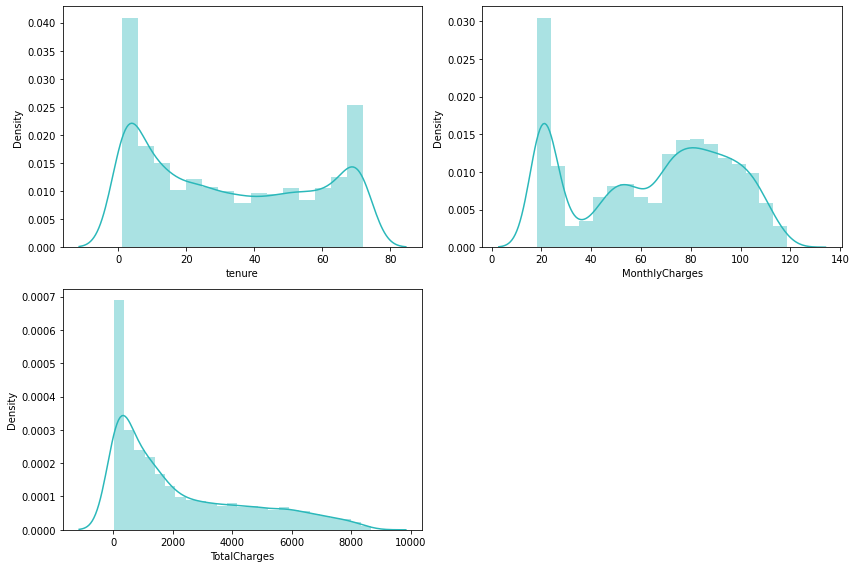

In [ ]:
plt.figure(figsize=(12,8))

for i in range(0, len(numerik)):
    plt.subplot(2, len(numerik)//2 + 1, i+1)
    sns.distplot(x=df_clean[numerik[i]], color='#2bb8ba')
    plt.xlabel(numerik[i])
    plt.tight_layout()

Dari grafik di atas terdapat beberapa info yang bisa dilihat:
  * Kolom `tenure` memiliki sebaran dengan dua titik puncak, sehingga dapat disimpulkan sebaran distribusi pada kolom `tenure` bersifat bimodal
  * Kolom `MonthlyCharges` memiliki sebaran dengan tiga titik puncak, sehingga dapat disimpulkan sebaran distribusi pada kolom `MonthlyCharges` bersifat multimodal
  * Kolom `TotalCharges` memilki satu titik puncak, sehingga dapat disimpulkan sebaran distribusi pada kolom `TotalCharges` bersifat unimodal yang positively skewed 


######Membuat boxplot untuk mendeteksi outlier

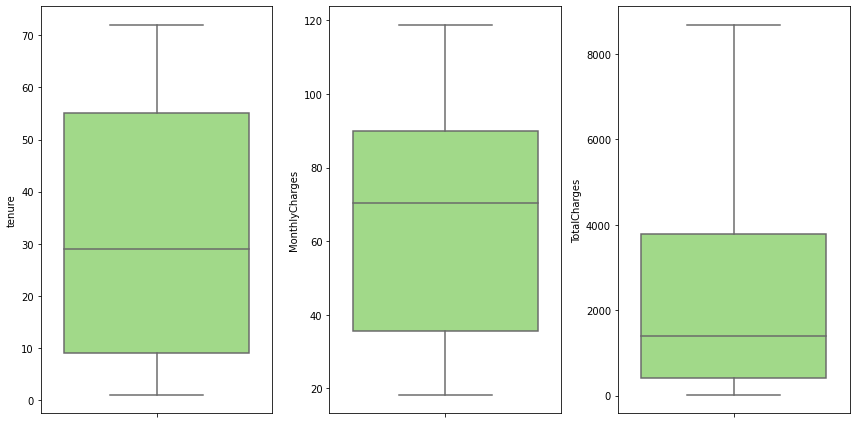

In [ ]:
plt.figure(figsize=(12,6))
for i in range(0, len(numerik)):
    plt.subplot(1, len(numerik), i+1)
    sns.boxplot(y=df_clean[numerik[i]], color='#9ce67c')
    plt.tight_layout()

Dari grafik di atas bisa dilihat terdapat outlier pada seluruh kolom numerik (`tenure`, `MonthlyCharges`, dan `TotalCharges`) 

####Analisis kolom string

Membuat filter untuk menseleksi kolom dengan tipe data string

In [ ]:
stringcol_demo = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
stringcol_service1 = ['PhoneService', 'MultipleLines', 'InternetService', 
                      'OnlineSecurity']
stringcol_service2 = ['OnlineBackup','DeviceProtection', 
                      'TechSupport']
stringcol_3party = ['StreamingTV', 'StreamingMovies']
stringcol_accinfo = ['Contract', 'PaperlessBilling', 
                     'PaymentMethod', 'Churn']

Dikarenakan jumlah kolom string yang banyak, maka filter untuk kolom string dibagi tiga berdasarkan kelompok informasi yang bisa didapat: 
  * `stringcol_demo` merupakan filter untuk kolom dengan informasi demografi user. 
  * `stringcol_service1` dan `stringcol_service2` merupakan filter untuk kolom dengan informasi layanan yang digunakan oleh user
  * `stringcol_3party` merupakan filter  untuk kolom dengan informasi penggunaan layanan internet untuk mengakses layanan dari pihak ketiga
  * `stringcol_accinfo` merupakan filter untuk kolom dengan informasi akun user

#####Rangkuman statistik kolom-kolom string

######Rangkuman statistik kolom-kolom demografi

In [ ]:
for column in stringcol_demo:
  print(f"Value counts of {column} column")
  print(df_clean[column].value_counts(), '\n')

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of SeniorCitizen column
0    5890
1    1142
Name: SeniorCitizen, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 



Dari data di atas, diketahui jumlah user berdasarkan karakteristik demografi:
  * Dari kolom `gender`, terdapat 2 nilai unik yaitu male (pria) dan female (perempuan)
    * Sebanyak 3549 user berjenis kelamin pria, sisanya berjenis kelamin perempuan
  * Dari kolom `SeniorCitizen`, terdapat 2 nilai unik yaitu 0 (bukan berusia senior [<65 tahun]) dan 1 (berusia senior [>=65 tahun])
    * Sebanyak 5890 user berusia bukan senior, sisanya berusia senior
  * Dari kolom `Partner`, terdapat 2 nilai unik yaitu No (tidak memiliki pasangan) dan Yes (memiliki pasangan)
    * Sebanyak 3693 user tidak tinggal bersama pasangan, sisanya tinggal bersama pasangan
  * Dari kolom `Dependents`, terdapat 2 nilai uni yaitu No (tidak tinggal bersama tanggungan [anak, orang tua, kakek, nenek, dsb]) dan Yes (tinggal bersama tanggungan)
    * Sebanyak 4933 user tidak tinggal bersama tanggungan, sisanya tinggal bersama tanggungan


######Rangkuman statistik kolom-kolom service

In [ ]:
for column in stringcol_service1:
  print(f"Value counts of {column} column")
  print(df_clean[column].value_counts(), '\n')

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value counts of OnlineSecurity column
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 



Dari data di atas, diketahui jumlah user berdasarkan layanan yang digunakan:
  * Pada kolom `PhoneService` terdapat 2 nilai unik yaitu Yes (menggunakan layanan telepon) dan No (tidak menggunakan layanan telepon)
    * Sebanyak 6352 user menggunakan layanan telepon, sisanya tidak menggunakan layanan telepon
  * Pada kolom `MultipleLines` terdapat 3 nilai unik yaitu No (hanya menggunakan satu jaringan telepon), Yes (menggunakan lebih dari satu jaringan telepon), dan No phone service (tidak menggunakan layanan telepon)
    * Sebanyak 3385 user hanya menggunakan satu jaringan telepon, sisanya menggunakan lebih dari satu jaringan telepon dan tidak menggunakan layanan telepon
  * Pada kolom `InternetService` terdapat 3 nilai unik yaitu, Fiber optic (user menggunakan layanan internet berbasis fiber optik), DSL (user menggunakan layanan internet berbasis DSL), dan No internet service (user tidak menggunakan layanan internet)
    * Sebanyak 3096 user menggunakan layanan internet berbasis fiber optik, sisanya menggunakan layanan internet berbasis DSL dan tidak menggunakan layanan internet
  * Pada kolom `OnlineSecurity` terdapat 3 nilai unik yaitu, No (tidak menggunakan layanan keamanan online), Yes (menggunakan layanan keamanan online), dan No internet service (tidak menggunakan layanan internet)
    * Sebanyak 3497 user tidak menggunakan layanan keamanan online, sisanya menggunakan layanan keamanan online dan tidak menggunakan layanan internet  

In [ ]:
for column in stringcol_service2:
  print(f"Value counts of {column} column")
  print(df_clean[column].value_counts(), '\n')

Value counts of OnlineBackup column
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64 

Value counts of DeviceProtection column
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64 

Value counts of TechSupport column
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64 



  * Pada kolom `OnlineBackup` terdapat 3 nilai unik yaitu, No (tidak menggunakan layanan pencadangan data online), Yes (menggunakan layanan pencadangan data online), dan No internet service (tidak menggunakan layanan internet)
    * Sebanyak 3087 user tidak menggunakan layanan pencadangan data online, sisanya menggunakan layanan pencadangan data online dan tidak menggunakan layanan internet 
  * Pada kolom `DeviceProtection` terdapat 3 nilai unik yaitu, No (tidak menggunakan layanan perlindungan perangkat), Yes (menggunakan layanan perlindungan perangkat), dan No internet service (tidak menggunakan layanan internet)
    * Sebanyak 3094 user tidak menggunakan layanan perlindungan perangkat, sisanya menggunakan layanan perlindungan perangkat dan tidak menggunakan layanan internet
  * Pada kolom `TechSupport` terdapat 3 nilai unik yaitu, No (tidak menggunakan layanan dukungan teknis), Yes (menggunakan layanan dukungan teknis), dan No internet service (tidak menggunakan layanan internet)
    * Sebanyak 3472 user tidak menggunakan layanan dukungan teknis, sisanya menggunakan layanan dukungan teknis dan tidak menggunakan layanan internet

######Rangkuman statistik kolom-kolom pihak ketiga

In [ ]:
for column in stringcol_3party:
  print(f"Value counts of {column} column")
  print(df_clean[column].value_counts(), '\n')

Value counts of StreamingTV column
No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64 

Value counts of StreamingMovies column
No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64 



  * Pada kolom `StreamingTV` terdapat 3 nilai unik yaitu, No (tidak melakukan streaming TV), Yes (melakukan streaming TV), dan No internet service (tidak menggunakan layanan internet)
    * Sebanyak 2809 user tidak melakukan streaming TV, sisanya menggunakan layanan streaming TV dan tidak menggunakan layanan internet
  * Pada kolom `StreamingMovies` terdapat 3 nilai unik yaitu, No (tidak melakukan streaming film), Yes (melakukan streaming film), dan No internet service (tidak menggunakan layanan internet)
    * Sebanyak 2781 user tidak melakukan streaming film, sisanya melakukan streaming film dan tidak menggunakan layanan internet

######Rangkuman statistik kolom-kolom informasi akun

In [ ]:
for column in stringcol_accinfo:
  print(f"Value counts of {column} column")
  print(df_clean[column].value_counts(), '\n')

Value counts of Contract column
Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64 

Value counts of PaperlessBilling column
Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64 

Value counts of PaymentMethod column
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64 

Value counts of Churn column
No     5163
Yes    1869
Name: Churn, dtype: int64 



Dari data di atas, diketahui jumlah user berdasarkan layanan akun yang digunakan:
  * Pada kolom `Contract` terdapat 3 nilai unik yaitu Month-to-month (user menggunakan kontrak per bulan), Two Year (user menggunakan kontrak 2 tahun) dan One year (user menggunakan kontrak 1 tahun)
    * Sebanyak 3875 user menggunakan kontrak per bulan, sedangkan sisanya menggunakan kontrak 2 tahun dan kontrak 1 tahun
  * Pada kolom `PaperlessBilling` terdapat 2 nilai unik yaitu Yes (user menggunakan tagihan tanpa kertas) dan No (user menggunakan tagihan kertas)
    * Sebanyak 4168 user menggunakan tagihan tanpa kertas, sisanya menggunakan tagihan kertas
  * Pada kolom `PaymentMethod` terdapat 4 nilai unik yaitu Electronic check (user membayar menggunakan cek elektronik), Mailed check (user membayar dengan menggunakan cek yang dikirim melalui surat), Bank transfer (automatic) (user membayar menggunakan transfer bank), dan Credit card (automatic) (user membayar menggunakan kartu kredit)
    * Sebanyak 2365 user membayar menggunakan cek elektronik, sisanya membayar dengan menggunakan cek yang dikirim melalui surat, membayar menggunakan transfer bank, dan membayar menggunakan kartu kredit
  * Pada kolom `Churn` terdapat 2 nilai unik yaitu No (user melanjutkan berlangganan) dan Yes (user berhenti berlangganan)
    * Sebanyak 5163 user melanjutkan berlangganan, sisanya berhenti berlangganan

#####Analisis string demografi

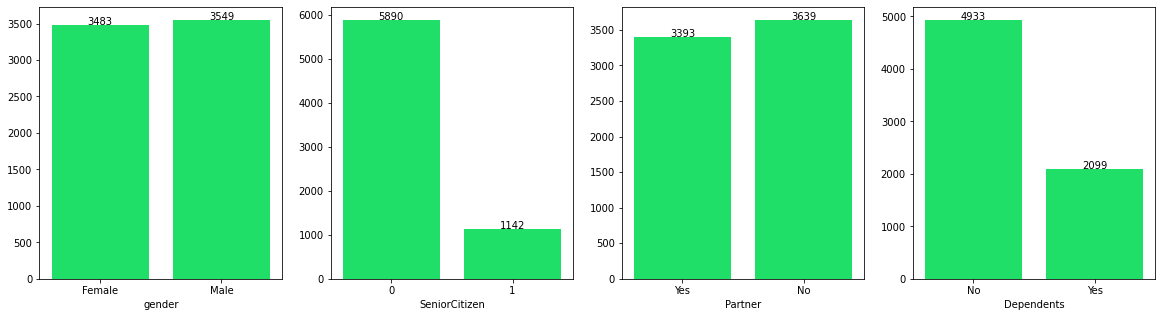

In [ ]:
plt.figure(figsize=(20,5))
for i in range(0, len(stringcol_demo)):
    plt.subplot(1, len(stringcol_demo), i+1)
    ax = sns.countplot(x=df_clean[stringcol_demo[i]], color='#00ff62')
    ax.set_ylabel('')
    for x in ax.patches:
      height = x.get_height()
      ax.text(x.get_x()+x.get_width()/2., height + 5,height ,ha="center")
    plt.tight_layout

Informasi yang didapat dari rangkuman statistik dan grafik di atas adalah:
  * Berdasarkan jenis `gender`, jumlah user cukup berimbang antara user dengan jenis kelamin pria dan perempuan
  * Berdasarkan kelompok `SeniorCitizen`, mayoritas user merupakan kelompok usia bukan senior dengan persentase sebesar 83.75% dari total user. Sisanya sebesar 16.25% merupakan kelompok usia senior
  * Berdasarkan kelompok `Partner`, jumlah user yang memiliki pasangan dengan yang tidak memiliki pasangan memiliki jumlah yang berimbang
  * Berdasarkan kelompok `Dependents`, mayoritas user masuk ke dalam kelompok yang tidak tinggal bersama tanggungan dengan persentase sebesar 70.15%. Sedangkan sisanya sebesar 29.85% tinggal bersama tanggungan

#####Analisis string service

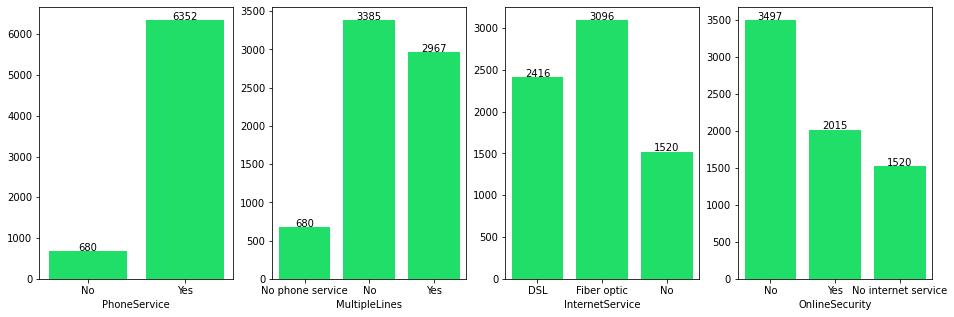

In [ ]:
plt.figure(figsize=(16,5))
for i in range(0, len(stringcol_service1)):
    plt.subplot(1, len(stringcol_service1), i+1)
    ax = sns.countplot(x=df_clean[stringcol_service1[i]], color='#00ff62')
    ax.set_ylabel('')
    for x in ax.patches:
      height = x.get_height()
      ax.text(x.get_x()+x.get_width()/2., height + 5,height ,ha="center")
    plt.tight_layout

Informasi yang didapat dari rangkuman statistik dan grafik di atas adalah:
  * Dari kolom `PhoneService`, mayoritas user menggunakan layanan jaringan telepon dengan persentase sebesar 90.32%. Sedangkan sebanyak 9.68% tidak menggunakan layanan jaringan telepon
  * Dari kolom `MultipleLines`, dari 6352 user yang menggunakan layanan jaringan telepon sebanyak 53.2% hanya menggunakan satu jaringan telepon. Sedangkan 46.8% menggunakan lebih dari satu jaringan telepon
  * Dari kolom `InternetService`, mayoritas user menggunakan layanan internet dengan persentase sebesar 78.3%. Sedangkan sebanyak 21.7% tidak menggunakan layanan internet.
    * Terdapat 5512 user yang menggunakan layanan internet, sebanyak 56.1% menggunakan layanan internet berbasis sambungan kabel fiber optic sedangkan sebanyak 43.9% menggunakan layanan internet berbasis kabel DSL
  * Dari kolom `OnlineSecurity`, dari 5512 user yang menggunakan layanan internet, mayoritas user tidak menggunakan layanan keamanan online yang ditawarkan dengan persentase sebesar 63.4%. Sedangkan user yang menggunakan layanan keamanan online adalah sebesar 36.6%


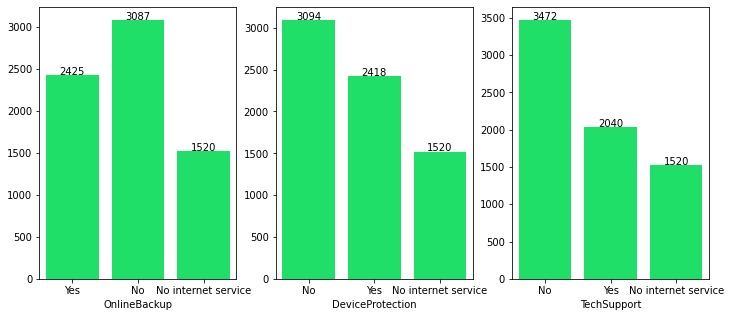

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0, len(stringcol_service2)):
    plt.subplot(1, len(stringcol_service2), i+1)
    ax = sns.countplot(x=df_clean[stringcol_service2[i]], color='#00ff62')
    ax.set_ylabel('')
    for x in ax.patches:
      height = x.get_height()
      ax.text(x.get_x()+x.get_width()/2., height + 5,height ,ha="center")
    plt.tight_layout

Informasi yang didapat dari rangkuman statistik dan grafik di atas adalah:
  * Dari kolom `OnlineBackup`, dari 5512 user yang menggunakan layanan internet, sebanyak 56% menggunakan layanan pencadangan data yang ditawarkan. Sedangkan sebanyak 44% tidak menggunakan layanan pencadangan data yang ditawarkan
  * Dari kolom `DeviceProtection`, dari 5512 user yang menggunakan layanan internet, sebanyak 56.13% tidak menggunakan layanan perlindungan perangkat yang ditawarkan. Sedangkan sebanyak 43.87% menggunakan layanan perlindungan perangkat yang ditawarkan
  * Dari kolom `TechSupport`, dari 5512 user yang menggunakan layanan internet, mayoritas user sebanyak 62.9% tidak menggunakan layanan bantuan teknis yang ditawarkan. Sedangkan sebanyak 37.1% menggunakan layanan bantuan teknis yang ditawarkan

#####Analisis string pihak ketiga

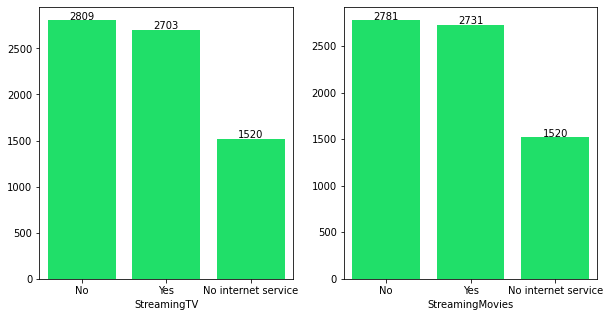

In [ ]:
plt.figure(figsize=(10,5))
for i in range(0, len(stringcol_3party)):
    plt.subplot(1, len(stringcol_3party), i+1)
    ax = sns.countplot(x=df_clean[stringcol_3party[i]], color='#00ff62')
    ax.set_ylabel('')
    for x in ax.patches:
      height = x.get_height()
      ax.text(x.get_x()+x.get_width()/2., height + 5,height ,ha="center")
    plt.tight_layout

  * Dari kolom `StreamingTV`, dari 5512 user yang menggunakan layanan internet, sebanyak 50.9% user tidak melakukan streaming TV. Sedangkan sebanyak 49.1% user melakukan streaming TV
  * Dari kolom `StreamingMovies`, dari 5512 user yang menggunakan layanan internet, 50.4% user tidak melakukan steaming film. Sedangkan 49.6% user melakukan streaming film

#####Analisis string informasi akun

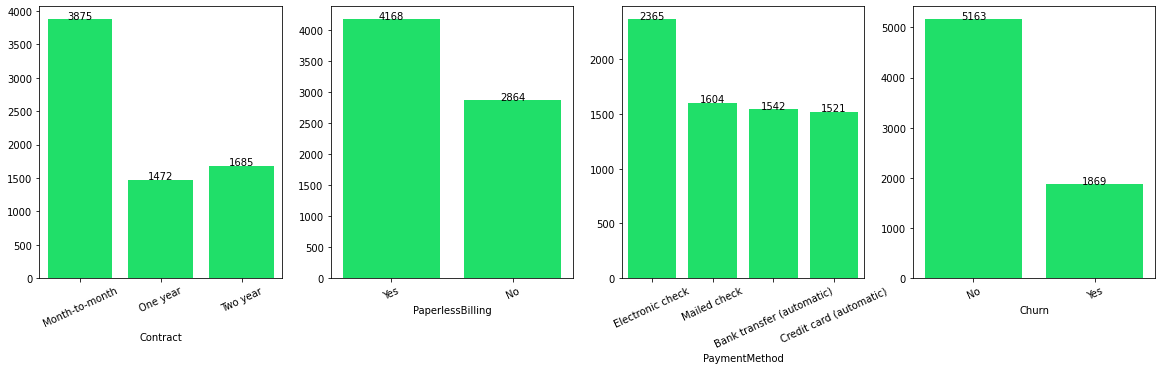

In [ ]:
plt.figure(figsize=(20,5))
for i in range(0, len(stringcol_accinfo)):
    plt.subplot(1, len(stringcol_accinfo), i+1)
    ax = sns.countplot(x=df_clean[stringcol_accinfo[i]], color='#00ff62')
    ax.set_ylabel('')
    for x in ax.patches:
      height = x.get_height()
      ax.text(x.get_x()+x.get_width()/2., height + 5,height ,ha="center")
    plt.tight_layout
    plt.xticks(rotation=25)

Informasi yang didapat dari rangkuman statistik dan grafik di atas adalah:
  * Dari kolom `Conract`, mayoritas user dengan persentase sebesar 55% menggunakan kontrak per bulan. Sedangkan 23.9% user menggunakan kontrak 2 tahun. Sisanya sebesar 21.1% user menggunakan kontrak 1 tahun
  * Dari kolom `PaperlessBilling`, sebanyak 59.2% user menggunakan tagihan tanpa kertas. Sedangkan sebanyak 40.8% user menggunakan tagihan kertas
  * Dari kolom `PaymentMethod`, sebanyak 33.6% user menggunakan metode pembayaran cek elektronik. Sebanyak 22.8% user menggunakan metode pembayaran cek yang dikirim melalui surat. Sebanyak 21.9% user menggunakan metode pembayaran transfer melalui bank. User yang menggunakan metode pembayaran kartu kredit sebanyak 21.7%
  * Dari kolom `Churn`, sebanyak 73.4% user melanjutkan menggunakan layanan yang ditawarkan. Sebanyak 26.6% user berhenti berlangganan

###Analisis bivariate

Dalam melakukan analisis bivariate, akan dibagi menjadi 5 kelompok analisis berdasarkan basis informasi yang digunakan:
  * Demographic-Demographic
  * Demographic-Service
  * Demographic-Third Party
  * Demographic-Account Information
  * Service-Third Party
  * Service-Account Information
  * Account Information-Account Information

####Demographic-Demographic

Adalah analisis bivariate dengan menggunakan 2 kolom yang masuk ke dalam kelompok informasi demografi

#####Partner-Dependents

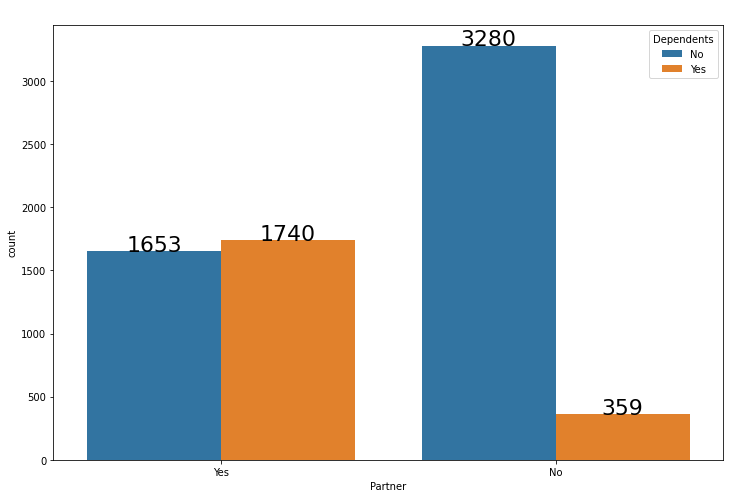

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_clean,
            x='Partner',
            hue='Dependents')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', color='black', size=22)
plt.show()

Dari grafik di atas dapat dilihat bahwa **user yang tinggal bersama pasangan hidup dan tinggal bersama tanggungan lebih banyak jumlahnya jika dibandingkan dengan yang tidak tinggal bersama tanggungan**. 

Sedangkan **user yang tidak tinggal bersama pasangan dan juga tidak tinggal bersama tanggungan lebih banyak jumlahnya jika dibandingkan dengan yang tinggal bersama tanggungan**.

#####Partner-SeniorCitizen

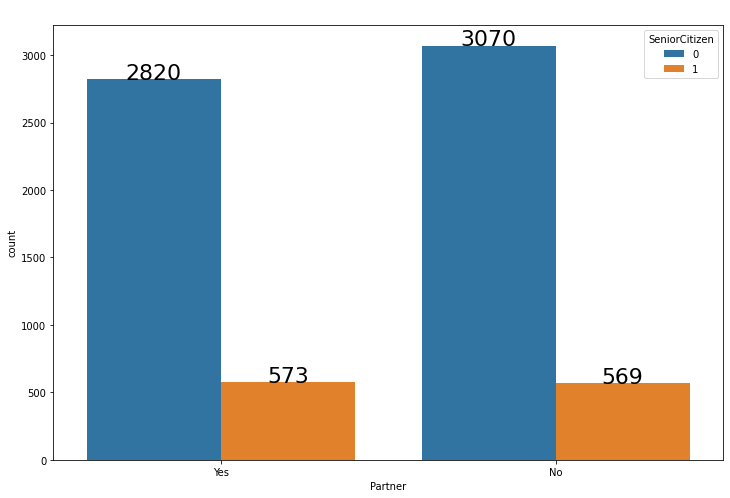

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_clean,
            x='Partner',
            hue='SeniorCitizen')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', color='black', size=22)
plt.show()

Dari grafik di atas dapat diketahui bahwa pada kelompok user yang berusia senior, jumlah user yang tinggal bersama pasangan dengan jumlah user yang tidak tinggal bersama pasangan memiliki perbedaan yang tidak terlalu signifikan (50.18% tinggal bersama pasangan, 49.82% tidak tinggal bersama pasangan).

Pada kelompok user yang berusia bukan senior, jumlah user yang tinggal bersama pasangan dengan jumlah user yang tidak tinggal bersama pasangan juga memiliki perbedaan yang tidak terlalu signifikan (47.9% tinggal bersama pasangan, 52.1% tidak tinggal bersama pasangan)

#####SeniorCitizen-gender

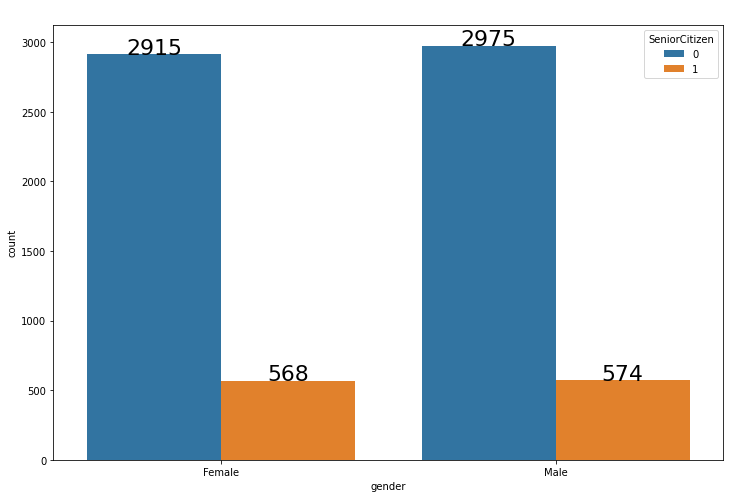

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_clean,
            x='gender',
            hue='SeniorCitizen')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', color='black', size=22)
plt.show()

Dari grafik di atas dapat diketahui bahwa pada kelompok user yang berusia senior, perbandingan jumlah user gender pria dengan jumlah user gender perempuan memiliki perbedaan yang tidak terlalu signifikan (50.3% pria, 49.7% perempuan).

Pada kelompok user yang berusia bukan senior, perbandingan jumlah user pria dengan jumlah perempuan juga memiliki perbedaan yang tidak terlalu signifikan (50.5% pria, 49.5% perempuan)

#####gender-Dependents

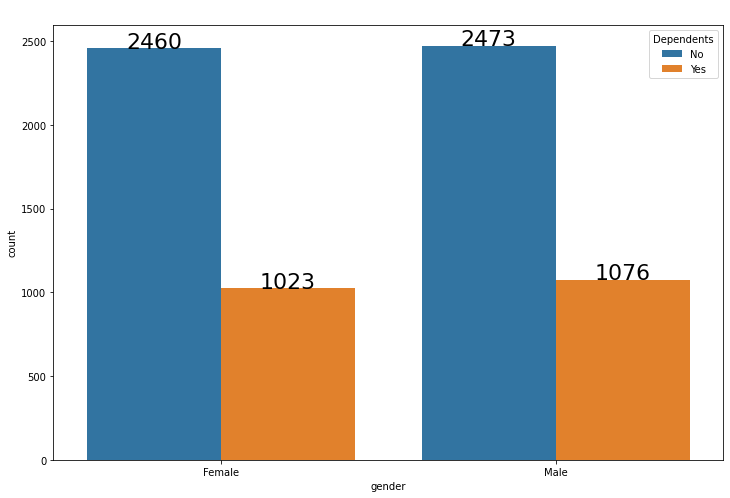

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_clean,
            x='gender',
            hue='Dependents')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', color='black', size=22)
plt.show()

Dari grafik di atas dapat diketahui bahwa pada kelompok user yang tinggal bersama tanggungan tidak terdapat perbedaan yang signifikan antara jumlah user berdasarkan gender (51.3% pria, 48.7% perempuan).

Sedangkan pada kelompok user yang tidak tinggal bersama pasangan juga tidak terdapat perbedaan yang signifikan antara jumlah user berdasarkan gender (50.1% pria, 49.9% perempuan)

####Demographic-Service

Adalah analisis bivariate dengan menggunakan 1 kolom dari kelompok informasi demografi dan 1 kolom dari kelompok informasi layanan yang ditawarkan

#####SeniorCitizen-InternetService

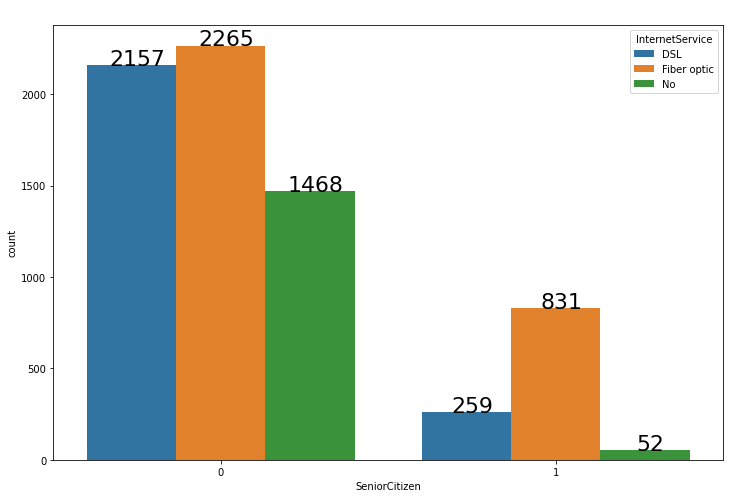

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_clean,
            x='SeniorCitizen',
            hue='InternetService')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()), ha='center', color='black', size=22)
plt.show()

Dari grafik di atas dapat dilihat bahwa **ada perbedaan pola untuk user layanan internet yang dikelompokkan berdasarkan usia. Pada kedua kelompok ini jumlah user yang menggunakan layanan internet berbasis fiber optik lebih banyak dibandingkan user yang menggunakan layanan internet berbasis kabel DSL. Namun pada user yang berusia senior kelompok user layanan internet berbasis fiber optik sangat dominan, sedangkan pada user yang bukan berusia senior kelompok user layanan internet berbasis fiber optik hanya memiliki selisih yang tidak signifikan (2.4%).**

Terdapat 1142 user masuk ke dalam kelompok usia warga senior. Sebanyak 1090 user dalam kelompok ini merupakan pengguna layanan internet dan mayoritas (sebanyak 76.2%) menggunakan layanan internet berbasis kabel fiber optik. Sedangkan 23.8% menggunakan kabel DSL.

Terdapat 5890 user yang masuk ke dalam kelompok usia bukan warga senior. Sebanyak 4422 user dalam kelompok ini merupakan pengguna layanan internet dan jumlah user yang menggunakan layanan internet berbasis kabel fiber optik lebih banyak jika dibandingkan dengan user yang menggunakan kabel DSL. Sebanyak 51.2% user merupakan pengguna layanan internet berbasis kabel fiber optik dan 48.8% user menggunakan layanan internet berbasis kabel DSL.

#####Dependents-InternetService

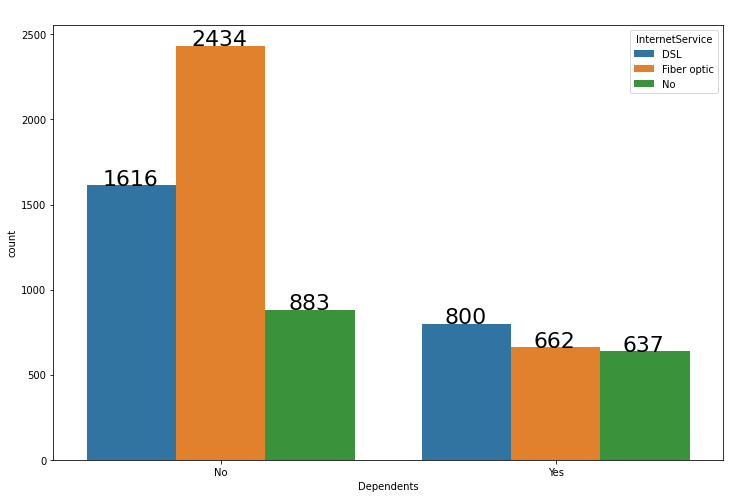

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_clean,
            x='Dependents',
            hue='InternetService')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.13, p.get_height()), ha='center', color='black', size=22)
plt.show()

Dari grafik di atas dapat dilihat bahwa **ada perbedaan pola user pengguna layanan internet yang dikelompokkan berdasarkan apakah user tersebut tinggal bersama tanggungan. Pada user yang tinggal bersama tanggungan jumlah user yang menggunakan layanan internet berbasis kabel DSL lebih banyak jika dibandingkan dengan user yang menggunakan layanan internet berbasis kabel fiber optik. Pada kelompok user yang tidak tinggal bersama tanggungan, jumlah user yang menggunakan layanan internet berbasis fiber optik secara signifikan lebih banyak jika dibandingkan dengan user yang menggunakan layanan internet berbasis kabel DSL dengan selisih persentase user mencapai 20%.**

Terdapat 2099 user masuk ke dalam kelompok user yang tinggal bersama tanggungan. Sebanyak 1462 user merupakan pengguna layanan internet dan jumlah user yang menggunakan layanan internet berbasis kabel DSL lebih banyak dibandingkan dengan user yang menggunakan layanan internet berbasis kabel fiber optik. Sebanyak 54.7% user dalam kelompok ini menggunakan layanan internet berbasis kabel DSL sedangkan yang menggunakan layanan internet berbasis kabel fiber optik sebanyak 45.3%.

Pada kelompok user yang tidak tinggal bersama tanggungan terdapat 4933 user yang masuk ke dalam kelompok ini. Sebanyak 4050 merupakan pengguna layanan internet. Mayoritas user tersebut menggunakan layanan internet berbasis kabel fiber optik. Sebanyak 60% user merupakan pengguna layanan internet berbasis kabel fiber optik dan 40% user menggunakan layanan internet berbasis kabel DSL.



####Demographic-Third Party

Adalah analisis bivariate dengan menggunakan 1 kolom dari kelompok informasi demografi dan 1 kolom dari kelompok informasi layanan pihak ketiga

#####SeniorCitizen-StreamingTV

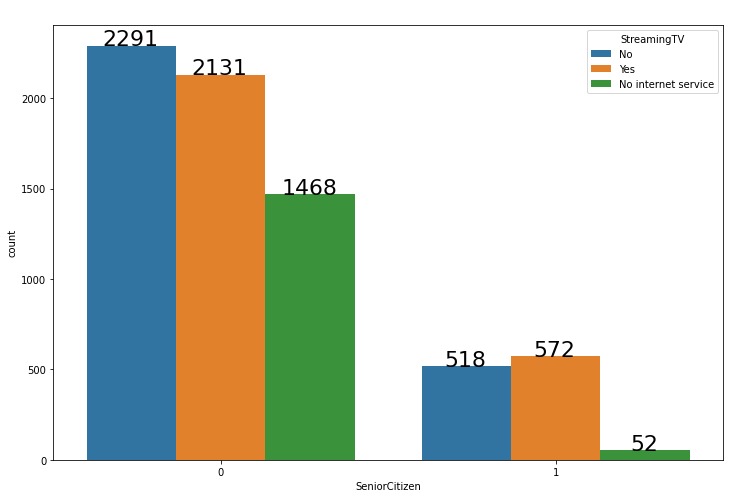

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_clean,
            x='SeniorCitizen',
            hue='StreamingTV')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.13, p.get_height()), ha='center', color='black', size=22)
plt.show()

Dari grafik di atas **ada perbedaan pola user yang menggunakan layanan internet dan melakukan streaming TV jika dikelompokkan berdasarkan usia. Pada kelompok usia senior, jumlah user yang melakukan streaming TV lebih banyak jika dibandingkan dengan user yang tidak melakukan streaming TV. Sedangkan pada kelompok user bukan berusia senior, jumlah user yang tidak melakukan streaming TV lebih banyak jika dibandingkan dengan user yang melakukan streaming TV .**

Terdapat 1090 user merupakan pengguna layanan internet dalam kelompok usia senior. Jumlah user yang masuk ke dalam kelompok ini dan melakukan streaming TV lebih banyak jika dibandingkan dengan user yang tidak melakukan streaming TV. Sebanyak 52.4% user dalam kelompok ini melakukan streaming TV sedangkan sebanyak 47.6% tidak melakukan hal tersebut.

Pada kelompok user yang bukan warga berusia senior, sebanyak 4422 merupakan pengguna layanan internet. Jumlah user yang masuk ke dalam kelompok ini dan tidak melakukan streaming TV lebih banyak jika dibandingkan dengan user yang melakukan. Sebanyak 51.8% user dalam kelompok ini tidak melakukan streaming TV sedangkan sebanyak 48.2% melakukan hal tersebut.



#####SeniorCitizen-StreamingMovies

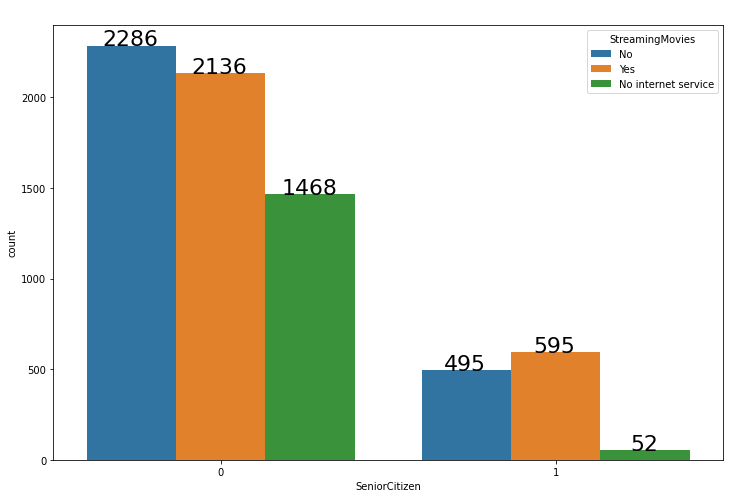

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_clean,
            x='SeniorCitizen',
            hue='StreamingMovies')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.13, p.get_height()), ha='center', color='black', size=22)
plt.show()

Dari grafik di atas **ada perbedaan pola user yang menggunakan layanan internet dan melakukan streaming film jika dikelompokkan berdasarkan usia. Pada kelompok usia senior, jumlah user yang melakukan streaming film lebih banyak jika dibandingkan dengan user yang tidak melakukan streaming film. Sedangkan pada kelompok user bukan berusia senior, jumlah user yang tidak melakukan streaming film lebih banyak jika dibandingkan dengan user yang melakukan streaming film.**

Terdapat 1090 user merupakan pengguna layanan internet dalam kelompok usia senior. Jumlah user yang masuk ke dalam kelompok ini dan melakukan streaming film lebih banyak jika dibandingkan dengan user yang tidak melakukan streaming film. Sebanyak 54.5% user dalam kelompok ini melakukan streaming film sedangkan sebanyak 45.5% tidak melakukan hal tersebut.

Pada kelompok user yang bukan warga berusia senior, sebanyak 4422 merupakan pengguna layanan internet. Jumlah user yang masuk ke dalam kelompok ini dan tidak melakukan streaming film lebih banyak jika dibandingkan dengan user yang melakukan streaming film. Sebanyak 51.6% user dalam kelompok ini tidak melakukan streaming film sedangkan sebanyak 48.4% melakukan hal tersebut.


#####Dependents-StreamingTV

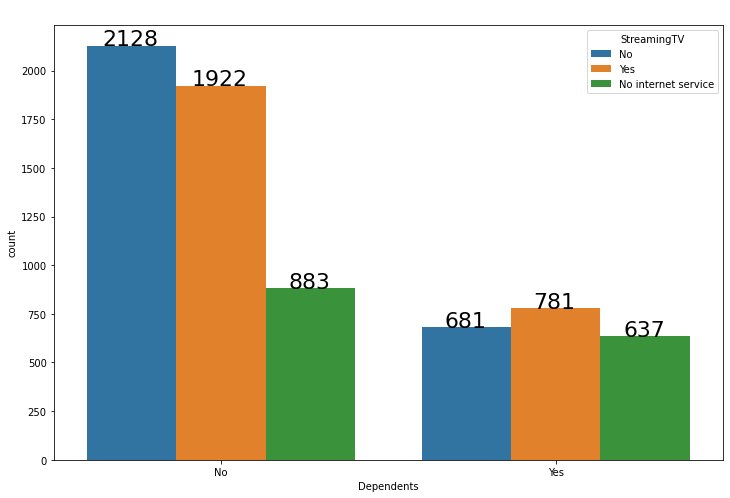

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_clean,
            x='Dependents',
            hue='StreamingTV')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.13, p.get_height()), ha='center', color='black', size=22)
plt.show()

Dari grafik di atas dapat dilihat bahwa **ada perbedaan pola user yang menggunakan layanan internet dan melakukan sreaming TV jika dikelompokkan berdasarkan apakah user tersebut tinggal bersama tanggungan. Pada kelompok user yang tinggal bersama tanggungan, jumlah user yang melakukan streaming TV lebih banyak jika dibandingkan dengan user tidak melakukan streaming TV. Sedangkan pada kelompok user yang tidak tinggal bersama tanggungan, jumlah user yang tidak melakukan streaming lebih banyak jika dibandingkan dengan user yang melakukan streaming TV.**

Terdapat 1462 user yang merupakan pengguna layanan internet dan tinggal bersama tanggungan. Pada kelompok user tersebut, jumlah user yang melakukan streaming TV lebih banyak daripada user yang tidak melakukan hal tersebut. Sebanyak 53.4% user di kelompok ini melakukan streaming TV sedangkan sebanyak 46.6% tidak melakukan hal tersebut.

Pada kelompok user yang tidak tinggal bersama tanggungan dan menggunakan layanan internet adalah sebanyak 4050. Jumlah user yang tidak melakukan streaming TV lebih banyak daripada user yang melakukan hal tersebut. Sebanyak 52.5% user pada kelompok ini tidak melakukan streaming TV sedangkan sebanyak 47.5% user melakukan hal tersebut.

#####Dependents-StreamingMovies

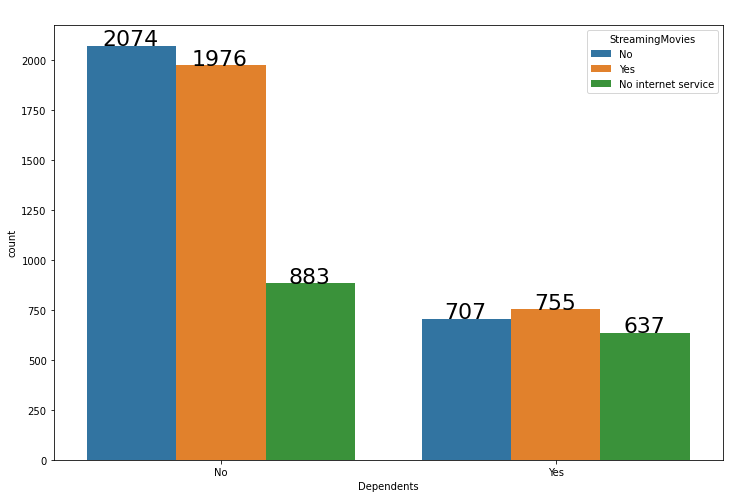

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_clean,
            x='Dependents',
            hue='StreamingMovies')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.13, p.get_height()), ha='center', color='black', size=22)
plt.show()

Dari grafik di atas dapat dilihat bahwa **ada perbedaan pola user yang menggunakan layanan internet dan sreaming film jika dikelompokkan berdasarkan apakah user tersebut tinggal bersama tanggungan. Pada kelompok user yang tinggal bersama tanggungan, jumlah user yang melakukan streaming film lebih banyak jika dibandingkan dengan user tidak melakukan streaming film. Sedangkan pada kelompok user yang tidak tinggal bersama tanggungan, jumlah user yang tidak melakukan streaming film lebih banyak jika dibandingkan dengan user yang melakukan streaming film.**

sebanyak 1462 user yang merupakan pengguna layanan internet dan tinggal bersama tanggungan. Pada kelompok user tersebut, jumlah antara user yang melakukan streaming film lebih banyak daripada user yang tidak melakukan hal tersebut. Sebanyak 51.6% user di kelompok ini melakukan streaming film sedangkan sebanyak 48.4% tidak melakukan hal tersebut.

Pada kelompok user yang tidak tinggal bersama tanggungan dan menggunakan layanan internet adalah sebanyak 4050. Jumlah antara user yang tidak melakukan streaming film lebih banyak jika dibandingkan dengan yang melakukan hal tersebut. Sebanyak 51.2% user pada kelompok ini tidak melakukan streaming film sedangkan sebanyak 48.8% user melakukan hal tersebut.

####Demographic-Account Information

Adalah analisis bivariate dengan menggunakan 1 kolom dari kelompok informasi demografi dan 1 kolom dari kelompok informasi akun pengguna

#####SeniorCitizen-Churn

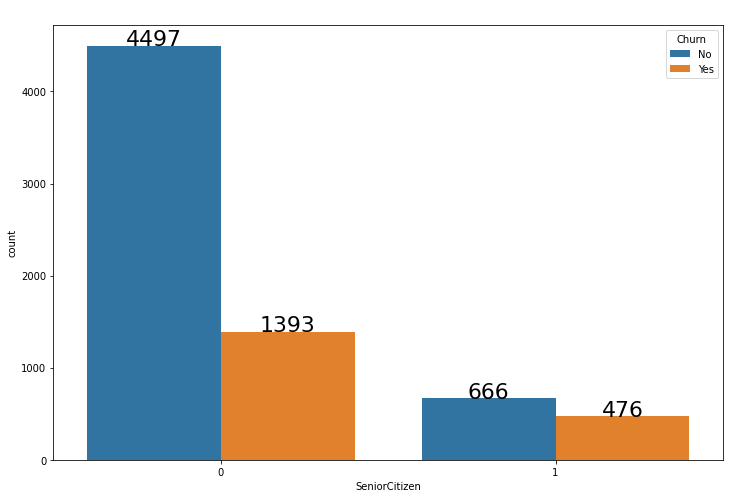

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_clean,
            x='SeniorCitizen',
            hue='Churn')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', color='black', size=22)
plt.show()

Dari grafik di atas dapat diketahui informasi:
  * Pada kelompok user berusia senior, **peluang user di dalam kelompok tersebut untuk berhenti berlangganan lebih tinggi** dibanding dengan user yang bukan berusia senior. **Dari 1142 user berusia senior, 41.7% user berhenti berlangganan** layanan yang ditawarkan
  * Pada kelompok user berusia bukan senior, dari 5890 user yang masuk ke dalam kelompok ini hanya 23.6% user yang berhenti berlangganan layanan yang ditawarkan 

#####Dependents-Churn

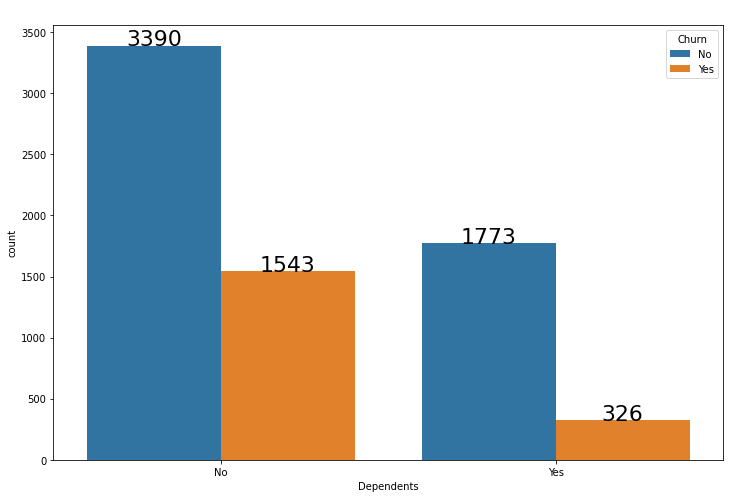

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_clean,
            x='Dependents',
            hue='Churn')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', color='black', size=22)
plt.show()

Dari grafik di atas, informasi yang didapatkan adalah:
  * Pada **kelompok user yang tinggal bersama tanggungan, peluang user dalam kelompok tersebut untuk berhenti berlangganan lebih kecil** jika dibandingkan dengan user yang tidak tinggal bersama tanggungan. Dari 2099 user yang memiliki tanggungan, hanya 15.5% yang berhenti berlangganan
  * Sedangkan dari 4933 user yang masuk kelompok tidak tinggal bersama tanggungan, 31.3% user berhenti berlangganan

#####SeniorCitizen-tenure

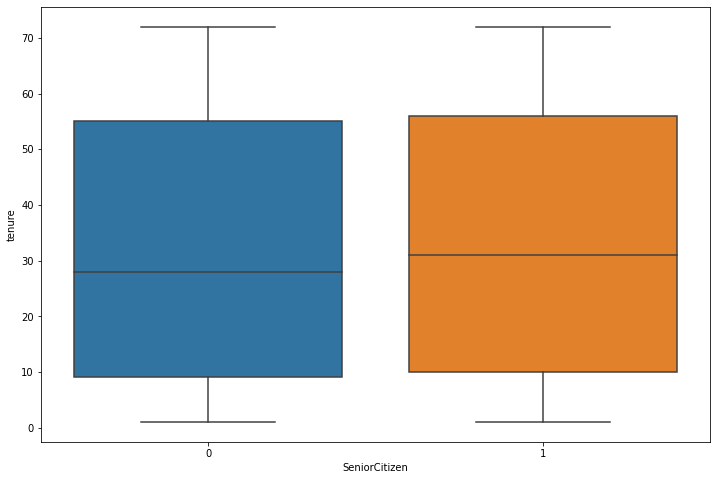

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(data=df_clean,
            x='SeniorCitizen',
            y='tenure')

Dari grafik di atas dapat dilihat bahwa karakteristik lama berlangganan antara user berusia senior dengan user bukan usia senior hampir identik. Yang menjadi pembeda adalah pada kelompok usia senior memiliki median yang lama berlangganan yang sedikit lebih tinggi dari median lama berlanggganan user bukan berusia senior

#####SeniorCitizen-Contract

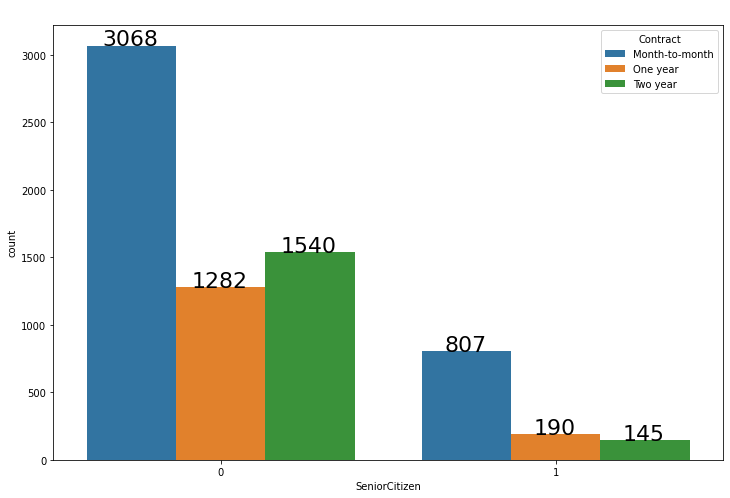

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_clean,
            x='SeniorCitizen',
            hue='Contract')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.13, p.get_height()), ha='center', color='black', size=22)
plt.show()

Dari grafik di atas informasi yang didapatkan adalah:
  * Pada kelompok user bukan usia senior, jenis kontrak yang paling populer adalah kontrak bulanan (52%), kemudian kontrak per 2 tahun (26.1%), dan terakhir kontrak per 1 tahun (21.7%)
  * Pada kelompok user berusia senior, jenis kontrak yang paling populer adalah kontrak bulanan (70.7%), kemudian kontrak per 1 tahun (16.6%), dan yang terakhir kontrak per 2 tahun (12.7%)

#####SeniorCitizen-PaperlessBilling

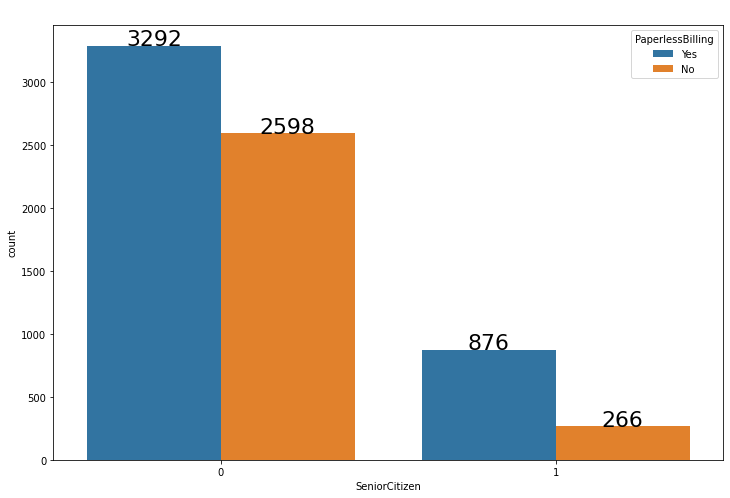

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_clean,
            x='SeniorCitizen',
            hue='PaperlessBilling')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', color='black', size=22)
plt.show()

Dari grafik di atas, informasi yang didapatkan adalah:
  * Pada user yang masuk kelompok usia bukan senior, jumlah user yang masih menggunakan tagihan kertas masih cukup tinggi. Sebanyak 44.1% user masih menggunakan cara tersebut
  * Pada kelompok usia senior, mayoritas user sudah tidak menggunakan tagihan kertas. Hanya 23.3% user yang masih menggunakan tagihan kertas

#####SeniorCitizen-PaymentMethod

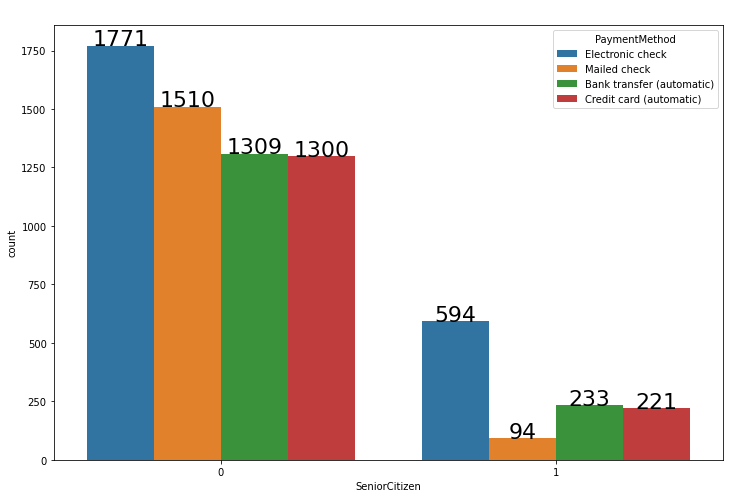

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_clean,
            x='SeniorCitizen',
            hue='PaymentMethod')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.1, p.get_height()), ha='center', color='black', size=22)
plt.show()

Dari grafik di atas, informasi yang bisa didapatkan adalah:
  * Pada kelompok user berusia bukan senior, metode pembayaran yang paling populer adalah cek elektronik (30.1%), kemudian cek yang dikirim melalui surat (25.6%), selanjutnya transfer bank (22.2%), dan terakhir kartu kredit (22.1%)
  * Pada kelompok user berusia senior, metode pembayaran yang paling populer adalah cek elektronik (52%), kemudian transfer bank (20.4%), selanjutnya kartu kredit (19.4%), dan terakhir cek yang dikirim melalui surat (8.2%)

####Service-Account Information

Adalah analisis multivariate dengan menggunakan 1 kolom dari kelompok informasi layanan yang ditawarkan dan 1 kolom dari kelompok informasi akun pengguna

#####PhoneService-MonthlyCharges

<Figure size 864x576 with 0 Axes>

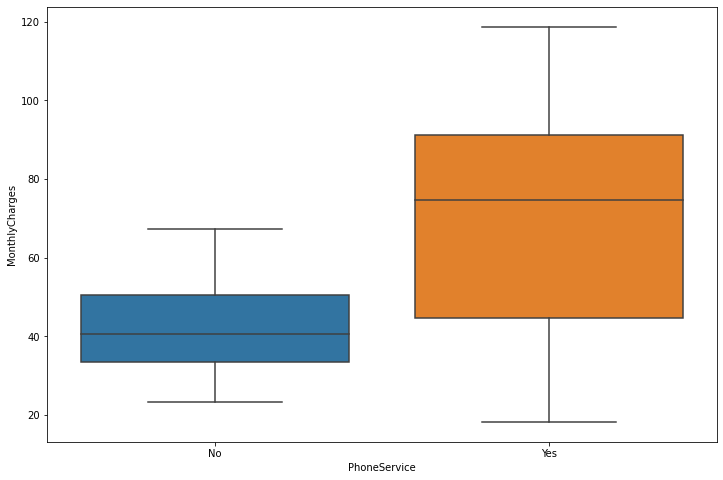

In [ ]:
plt.figure(figsize=(12,8))
plt.figure(figsize=(12,8))
ax = sns.boxplot(data=df_clean,
            x='PhoneService',
            y='MonthlyCharges')

Dari grafik di atas, user yang menggunakan layanan telepon memiliki tagihan bulanan yang lebih tinggi dibandingkan dengan user yang tidak menggunakan layanan telepon

#####InternetService-MonthlyCharges

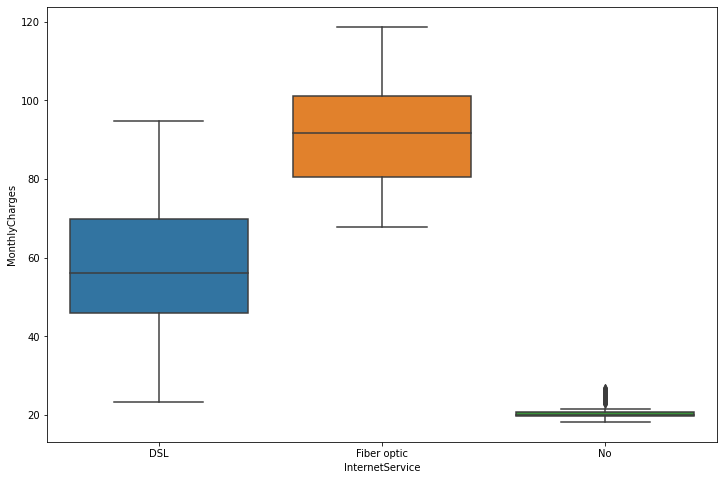

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(data=df_clean,
            x='InternetService',
            y='MonthlyCharges')

Dari grafik di atas dapat diketahui bahwa **tagihan bulanan user yang menggunakan internet berbasis fiber optik  lebih tinggi** dibandingkan dengan user yang menggunakan internet berbasis kabel DSL

#####PhoneService-Churn

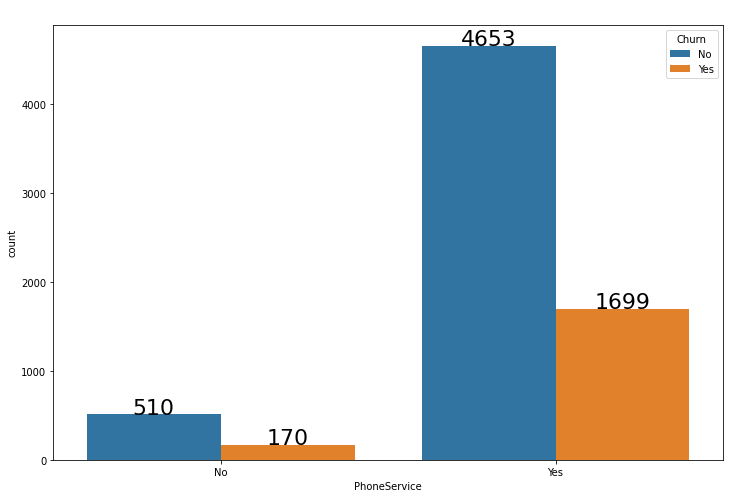

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_clean,
            x='PhoneService',
            hue='Churn')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', color='black', size=22)
plt.show()

Dari grafik di atas, tingkat loyalitas user pengguna layanan telepon dengan user yang bukan pengguna layanan telepon berada di tingkat yang sama. Pada user yang menggunakan layanan telepon, ada 26.7% user yang berhenti berlangganan. Pada user yang tidak menggunakan telepon, ada 25% user yang berhenti berlangganan

#####InternetService-Churn

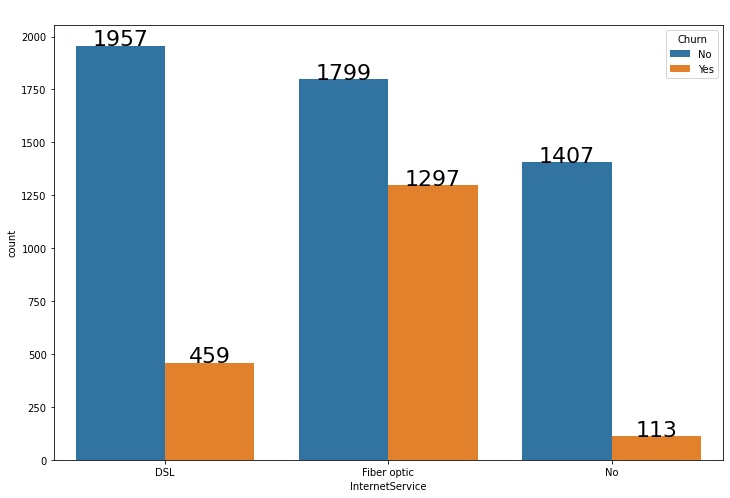

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_clean,
            x='InternetService',
            hue='Churn')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', color='black', size=22)
plt.show()

Dari grafik di atas, dapat dilihat bahwa **loyalitas user yang menggunakan layanan internet berbasis fiber optik perlu menjadi perhatian khusus. Sebanyak 41.9% user yang menggunakan layanan internet fiber optik berhenti berlangganan layanan yang ditawarkan.** Sedangkan pada user yang menggunakan layanan internet berbasis kabel DSL hanya 19% user yang berhenti berlangganan layanan yang ditawarkan dan pada user yang tidak menggunakan layanan internet hanya 7.4% user yang berhenti berlangganan layanan yang ditawarkan

#####PhoneService-tenure

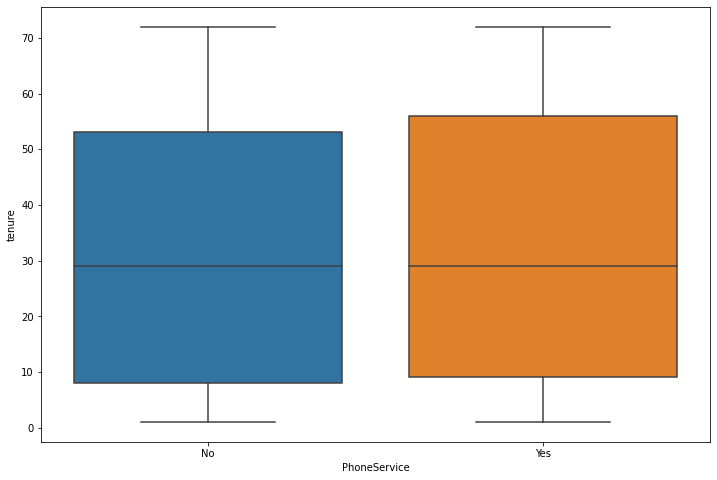

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(data=df_clean,
            x='PhoneService',
            y='tenure')

Dilihat dari grafik di atas, **kelompok user yang menggunakan layanan telepon dan kelompok user yang tidak menggunakan layanan telepon memiliki karakteristik lama berlangganan yang hampir sama**

#####InternetService-tenure

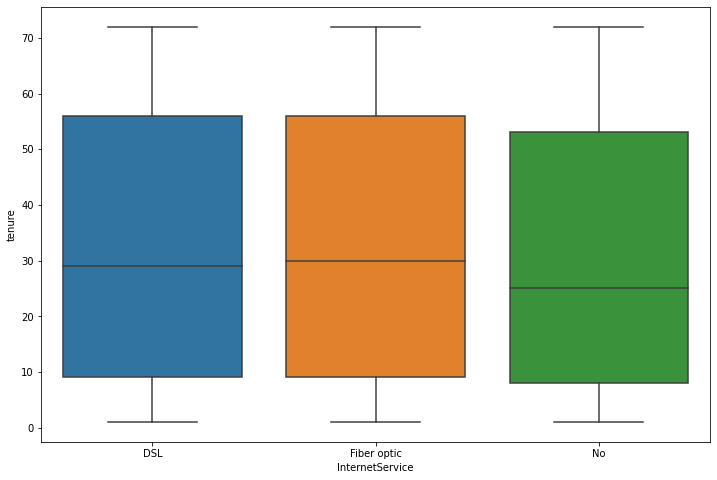

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(data=df_clean,
            x='InternetService',
            y='tenure')

Dilihat dari grafik di atas, **kelompok user yang menggunakan layanan internet fiber optik dan kelompok user yang menggunakan layanan internet DSL memiliki karakteristik lama berlangganan yang hampir sama.** Karakteristik lama berlanggan kelompok user yang tidak menggunakan internet juga hampir sama dengan kedua kelompok sebelumnya, namun pada kelompok user yang tidak menggunakan layanan internet nilai median lama berlangganan lebih rendah dari kedua kelompok tersebut

####Third Party-Account Information

#####StreamingTV-Churn

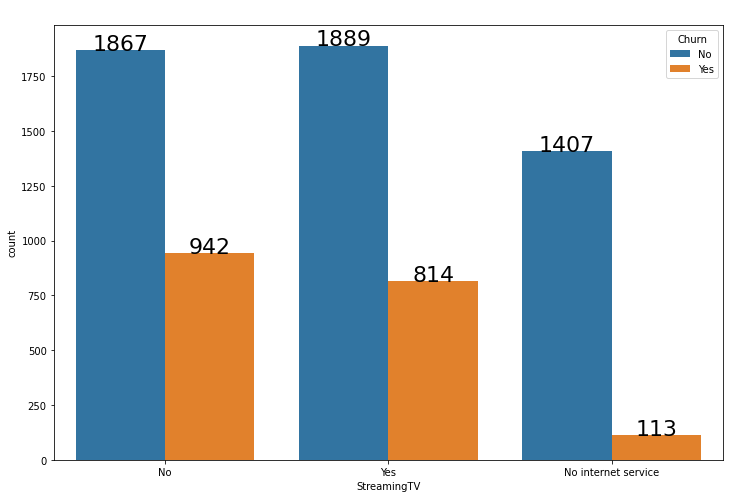

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_clean,
            x='StreamingTV',
            hue='Churn')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', color='black', size=22)
plt.show()

Dari grafik di atas dapat diketahui bahwa **loyalitas user pengguna internet yang melakukan streaming TV dengan yang tidak melakukan streaming TV hampir sama.** Pada user yang melakukan streaming TV, sebanyak 30.1% user berhenti berlangganan. Sedangkan pada user yang tidak melakukan streaming TV, sebanyak 33.5% user berhenti berlangganan

#####StreamingMovies-Churn

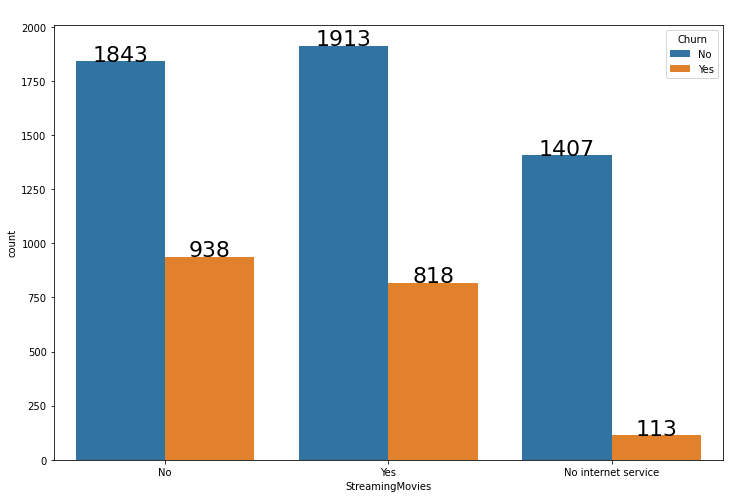

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_clean,
            x='StreamingMovies',
            hue='Churn')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', color='black', size=22)
plt.show()

Dari grafik di atas dapat diketahui bahwa **loyalitas user pengguna internet yang melakukan streaming film dengan yang tidak melakukan streaming film hampir sama.** Pada user yang melakukan streaming film, sebanyak 30% user berhenti berlangganan. Sedangkan pada user yang tidak melakukan streaming film, sebanyak 33.7% user berhenti berlangganan

####Account Information-Account Information

Adalah analisis multivariate dengan menggunakan 2 kolom dari kelompok informasi akun pengguna

#####Contract-MonthlyCharges

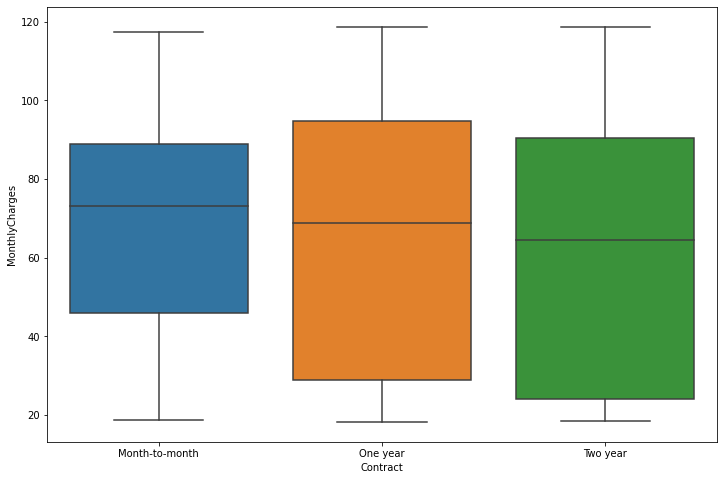

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(data=df_clean,
            x='Contract',
            y='MonthlyCharges')

Dari grafik di atas dapat diketahui bahwa user dengan kontrak per bulan memiliki median tagihan yang paling tinggi diikuti user dengan kontrak 1 tahun dan terakhir user dengan kontrak 2 tahun

#####tenure-Contract

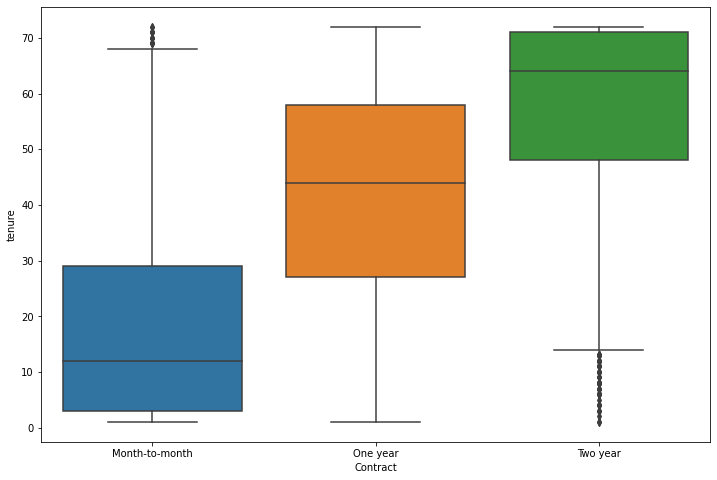

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(data=df_clean,
            x='Contract',
            y='tenure')

Dari grafik di atas dapat diketahui bahwa pada umumnya kelompok user dengan kontrak 2 tahun merupakan user yang paling lama berlangganan layanan yang ditawarkan. Hal ini dilihat dari nilai mediannya yang mencapai lebih dari 60 bulan. Kelompok user selanjutnya yang paling lama berlangganan adalah kelompok user dengan kontrak 1 tahun dengan median lama berlangganan mencapai lebih dari 40 tahun. Yang terakhir adalah kelompok user dengan kontrak per bulan dimana median lama berlangganan kelompok user ini hanya lebih dari 10 bulan

#####tenure-Churn

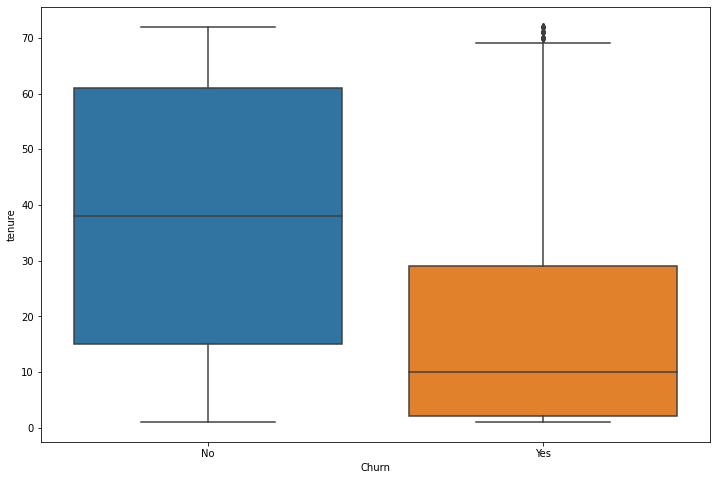

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(data=df_clean,
            x='Churn',
            y='tenure')

Dari grafik di atas dapat dilihat bahwa secara umum kelompok user yang masih berlangganan merupakan user yang sudah berlangganan sejak lama. Hal ini dilihat dari nilai median lama berlangganan kelompok user tersebut yang mencapai lebih dari 30 tahun. Sedangkan pada kelompok user yang berhenti berlangganan nilai median lama berlangganan kelompok user ini hanya mencapai 10 bulan. Namun perlu diperhatikan terdapat outlier dimana terdapat beberapa user yang sudah berlangganan selama lebih dari 60 bulan namun memutuskan untuk berhenti berlangganan

#####Contract-Churn

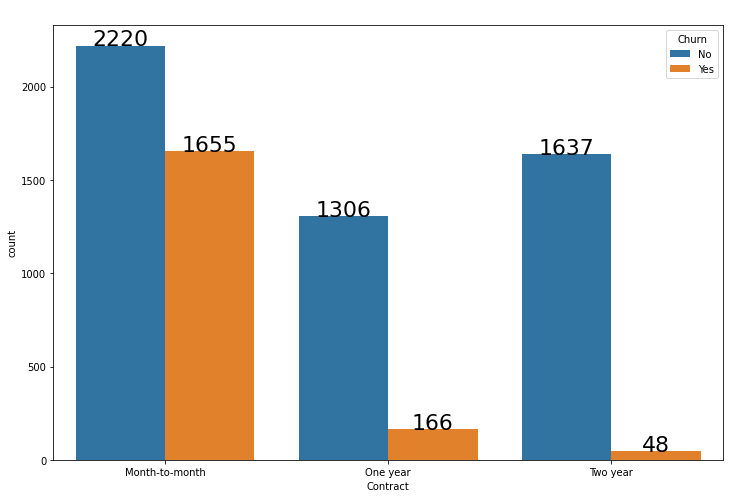

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_clean,
            x='Contract',
            hue='Churn')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', color='black', size=22)
plt.show()

Dari grafik di atas dapat dilihat bahwa **kelompok user dengan kontrak per bulan memiliki persentase user berhenti berlangganan yang besar**. Sebanyak 42.7% user dalam kelompok tersebut telah berhenti berlangganan. Sedangkan untuk kelompok user dengan kontrak 1 tahun hanya 11.28% dan kelompok user dengan kontrak 2 tahun hanya 2.8%

#####PaymentMethod-Churn

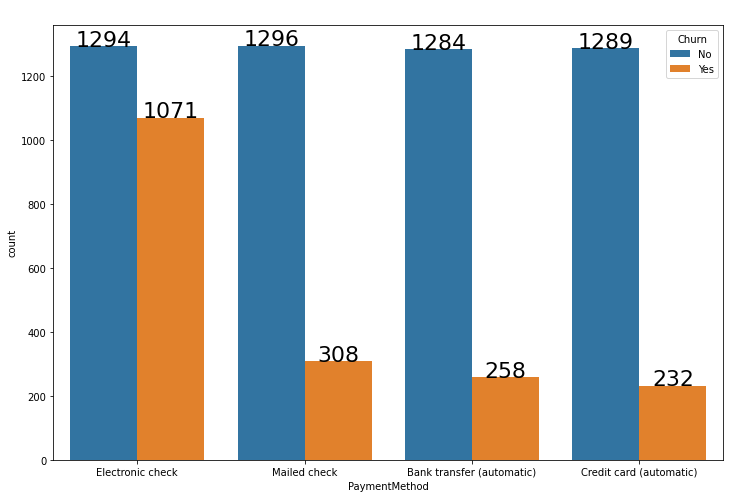

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_clean,
            x='PaymentMethod',
            hue='Churn')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', color='black', size=22)
plt.show()

Dari grafik di atas dapat dilihat bahwa pada **kelompok user yang membayar dengan cek elektronik, jumlah user yang berhenti berlangganan memiliki persentase yang cukup tinggi.** Sebanyak 45.28% user pada kelompok user tersebut berhenti berlangganan. Sedangkan pada kelompok user cek yang dikirim melalui surat hanya sebesar 19.2%, kelompok user transfer bank sebesar 16.73%, dan kelompok user kartu kredit sebesar 15.25%

#####PaperlessBilling-PaymentMethod

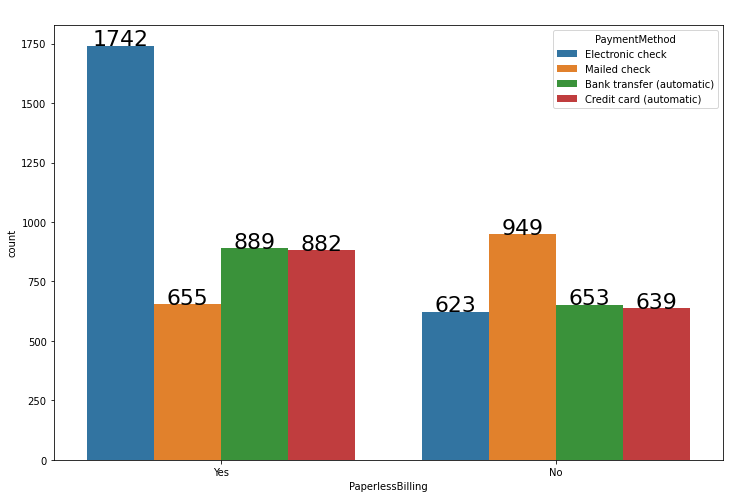

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_clean,
            x='PaperlessBilling',
            hue='PaymentMethod')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.1, p.get_height()), ha='center', color='black', size=22)
plt.show()

Dari grafik di atas, informasi yang didapatkan adalah:
  * **Pada kelompok user yang menerima tagihan kertas, metode pembayaran yang paling populer adalah cek yang dikirim melalui surat**. Sebanyak 33.1% user pada kelompok tersebut menggunakan metode pembayaran ini. Metode pembayaran yang populer selanjutnya adalah transfer bank (22.8%), kemudian kartu kredit (22.3%), dan terakhir cek elektronik (21.8%)
  * **Pada kelompok user yang menerima tagihan tanpa kertas, metode pembayaran yang paling populer adalah cek elektronik**. Sebanyak 41.8% user pada kelompok tersebut menggunakan metode pembayaran ini. Metode pembayaran yang populer selanjutnya adalah transfer bank (21.3%), kemudian kartu kredit (21.2%), dan terakhir cek yang dikirim melalui surat (15.7%)

#####Churn-MonthlyCharges

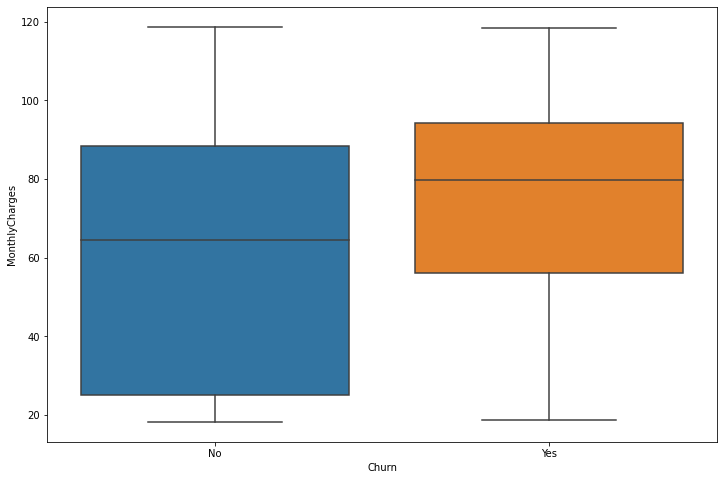

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(data=df_clean,
            x='Churn',
            y='MonthlyCharges')

Dari grafik di atas dapat dilihat bahwa **kelompok user yang berhenti berlangganan memiliki tagihan bulanan yang lebih tinggi dibanding dengan user yang masih melanjutkan berlangganan.** Hal ini dapat dilihat dari nilai median kelompok user yang berhenti berlangganan yang mencapai 80. Sedangkan pada kelompok user yang melanjutkan berlangganan nilai mediannya hanya lebih dari 60

###Kesimpulan sementara berdasarkan standard EDA

* Rata-rata lama berlangganan dari seluruh user adalah 32.42 bulan dengan nilai median 29 bulan
* Rata-rata tagihan bulanan dari seluruh user adalah 64.80 dengan nilai median 70.35
* Rata-rata total tagihan dari seluruh user adalah 2283.30 dengan nilai median 1397.48
* Tidak terdapat outlier untuk kolom numerik (tenure, MonthlyCharges, dan TotalCharges)
* Jumlah user berimbang antara user dengan jenis kelamin pria dan perempuan
* Mayoritas user (83.75%) merupakan kelompok usia bukan warga senior (dibawah 65 tahun)
* Jumlah user yang memiliki pasangan dengan yang tidak memiliki pasangan memiliki jumlah yang berimbang
* Mayoritas user (70.15%) masuk ke dalam kelompok yang tidak tinggal bersama tanggungan (anak, orang tua, kakek, nenek, dsb)
* Mayoritas user (90.32%) menggunakan layanan telepon yang ditawarkan
* Dari 6352 user yang menggunakan layanan telepon, sebanyak 46.8% user menggunakan lebih dari satu jaringan telepon
* Layanan internet yang paling populer adalah layanan internet berbasis fiber optik (56.1%)
* Layanan tambahan berupa keamanan onliner, pencadangan online, perlindungan perangkat, dan dukungan teknis kurang populer
* Jumlah user yang melakukan streaming TV dengan yang tidak cukup berimbang
* Jumlah user yang melakukan streaming film dengan yang tidak cukup berimbang
* Metode pembayaran yang paling populer adalah cek elektronik (33.6%)
* Jenis kontrak yang paling populer adalah kontrak per bulan (55%)
* Jenis tagihan yang paling populer adalah tagihan tanpa kertas (59.2%)
* Persentase user yang masih melanjutkan menggunakan layanan yang ditawarkan adalah sebesar 73.4%
* Jika user yang berhenti berlangganan (churn) dilihat berdasarkan beberapa kategori, ada 5 kategori yang perlu menjadi perhatian yaitu usia user, tanggungan, layanan internet yang digunakan, kontrak, dan metode pembayaran
* Berdasarkan median datanya, kelompok user yang berhenti berlangganan memiliki tagihan bulanan yang lebih tinggi dibanding dengan user yang masih melanjutkan berlangganan
* Layanan internet berbasis fiber optik memiliki median tagihan paling tinggi jika dibandingkan dengan layanan internet DSL dan tanpa layanan internet
* Layanan telepon memiliki median tagihan yang lebih tinggi jika dibandingkan dengan tanpa layanan telepon
* Streaming TV dan film lebih populer pada kelompok user usia senior dan kelompok user yang tinggal bersama tanggungan
* Kelompok user yang menggunakan layanan telepon dan kelompok user yang tidak menggunakan layanan telepon memiliki karakteristik lama berlangganan yang hampir sama
* Kelompok user yang menggunakan layanan internet fiber optik dan kelompok user yang menggunakan layanan internet DSL memiliki karakteristik lama berlangganan yang hampir sama  




##Deep-dive exploration

###Membuat kolom baru untuk menambah informasi terkait karakteristik user

####Membuat kolom Internet

Kolom Internet merupakan kolom boolean yang memberikan informasi apakah user menggunakan layanan internet (baik berbasis DSL atau fiber optik) atau tidak

In [ ]:
df_clean['Internet'] = np.where(df_clean['InternetService']!='No',True,False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_clean[df_clean['InternetService'].isin(['No'])].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID_check,Internet
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No,False,False
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No,False,False
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No,False,False
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,False,False
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No,False,False


In [ ]:
df_clean[df_clean['Internet'].isin([True])].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID_check,Internet
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,False,True
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,False,True
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,False,True
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,False,True
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,False,True


####Membuat kolom Streaming

Kolom Streaming merupakan kolom boolean yang memberikan informasi apakah user melakukan setidaknya salah satu kegiatan streaming (TV atau film)

In [ ]:
df_clean['Streaming'] = np.where(((df_clean['StreamingTV']=='Yes')|(df_clean['StreamingMovies']=='Yes')),1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_clean[df_clean['Streaming'].isin([1])].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID_check,Internet,Streaming
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,False,True,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,False,True,1
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,False,True,1
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,One year,No,Credit card (automatic),100.35,5681.10,No,False,True,1
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,False,True,1


In [ ]:
df_clean[df_clean['Streaming'].isin([0])].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID_check,Internet,Streaming
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,False,True,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,False,True,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,False,True,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,False,True,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,False,True,0


####Membuat kolom StreamingAll

Kolom StreamingAll adalah kolom boolean yang memberikan informasi apakah user melakukan streaming TV dan film

In [ ]:
df_clean['StreamingAll'] = np.where(((df_clean['StreamingTV']=='Yes')&(df_clean['StreamingMovies']=='Yes')),1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_clean[df_clean['StreamingAll'].isin([1])].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID_check,Internet,Streaming,StreamingAll
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,False,True,1,1
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,False,True,1,1
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,One year,No,Credit card (automatic),100.35,5681.10,No,False,True,1,1
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,False,True,1,1
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Month-to-month,Yes,Electronic check,105.50,2686.05,No,False,True,1,1


In [ ]:
df_clean[df_clean['StreamingAll'].isin([0])].sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID_check,Internet,Streaming,StreamingAll
3913,8749-TZYEC,Male,0,Yes,No,72,Yes,Yes,No,No internet service,...,Two year,No,Credit card (automatic),24.80,1874.30,No,False,False,0,0
403,3067-SVMTC,Female,0,Yes,No,68,Yes,No,DSL,Yes,...,One year,No,Bank transfer (automatic),55.90,3848.80,No,False,True,0,0
666,7538-GWHML,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,No,Electronic check,69.65,145.15,Yes,False,True,0,0
6611,8690-UPCZI,Male,0,Yes,Yes,29,Yes,Yes,DSL,Yes,...,One year,No,Bank transfer (automatic),69.05,1958.45,No,False,True,1,0
2356,3450-WXOAT,Male,0,No,No,46,Yes,No,DSL,No,...,Month-to-month,Yes,Credit card (automatic),45.20,2065.15,No,False,True,0,0


####Membuat kolom StreamTV dan StreamMov

Kolom StreamTV dan StreamMov merupakan kolom boolean yang memberikan informasi apakah user melakukan streaming TV atau streaming film

#####StreamTV

In [ ]:
df_clean['StreamTV'] = np.where((df_clean['StreamingTV']=='Yes'),1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_clean[df_clean['StreamTV'].isin([1])].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID_check,Internet,Streaming,StreamingAll,StreamTV
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Electronic check,99.65,820.50,Yes,False,True,1,1,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,Yes,Credit card (automatic),89.10,1949.40,No,False,True,1,0,1
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Electronic check,104.80,3046.05,Yes,False,True,1,1,1
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,No,Credit card (automatic),100.35,5681.10,No,False,True,1,1,1
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,Bank transfer (automatic),103.70,5036.30,Yes,False,True,1,1,1


In [ ]:
df_clean[df_clean['StreamTV'].isin([0])].sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID_check,Internet,Streaming,StreamingAll,StreamTV
1390,8039-ACLPL,Female,0,Yes,Yes,72,Yes,No,DSL,Yes,...,No,Credit card (automatic),68.75,4888.20,No,False,True,1,0,0
147,2135-RXIHG,Male,0,No,No,1,Yes,No,DSL,No,...,Yes,Electronic check,45.65,45.65,Yes,False,True,0,0,0
4747,8884-FEEWR,Male,0,No,No,35,Yes,No,No,No internet service,...,No,Bank transfer (automatic),20.60,754.00,No,False,False,0,0,0
288,3488-PGMQJ,Male,1,No,No,8,Yes,No,Fiber optic,No,...,Yes,Electronic check,74.50,606.55,Yes,False,True,0,0,0
1561,1157-BQCUW,Male,0,No,No,1,Yes,Yes,Fiber optic,No,...,Yes,Electronic check,74.95,74.95,Yes,False,True,0,0,0


#####StreamMov

In [ ]:
df_clean['StreamMov'] = np.where((df_clean['StreamingMovies']=='Yes'),1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_clean[df_clean['StreamMov'].isin([1])].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID_check,Internet,Streaming,StreamingAll,StreamTV,StreamMov
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Electronic check,99.65,820.50,Yes,False,True,1,1,1,1
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Electronic check,104.80,3046.05,Yes,False,True,1,1,1,1
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Credit card (automatic),100.35,5681.10,No,False,True,1,1,1,1
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Bank transfer (automatic),103.70,5036.30,Yes,False,True,1,1,1,1
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Electronic check,105.50,2686.05,No,False,True,1,1,1,1


In [ ]:
df_clean[df_clean['StreamMov'].isin([0])].sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID_check,Internet,Streaming,StreamingAll,StreamTV,StreamMov
1581,2782-JEEBU,Male,0,No,No,21,No,No phone service,DSL,No,...,Mailed check,36.00,780.15,No,False,True,0,0,0,0
2772,3470-OBUET,Female,0,Yes,Yes,67,Yes,Yes,DSL,Yes,...,Credit card (automatic),74.00,4868.40,No,False,True,1,0,1,0
5024,8774-GSBUN,Male,0,Yes,No,72,Yes,Yes,No,No internet service,...,Mailed check,25.40,1797.10,No,False,False,0,0,0,0
4860,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,...,Mailed check,40.55,590.35,No,False,True,0,0,0,0
1928,2484-DGXPZ,Female,0,Yes,Yes,31,Yes,No,No,No internet service,...,Mailed check,19.55,658.95,Yes,False,False,0,0,0,0


####Membuat kolom CompletePack

Kolom CompletePack adalah kolom boolean yang memberikan informasi apakah user menggunakan seluruh layanan yang ditawarkan

In [ ]:
df_clean['CompletePack'] = np.where(((df_clean['PhoneService']=='Yes')&(df_clean['MultipleLines']=='Yes')&(df_clean['Internet']==True)&(df_clean['OnlineSecurity']=='Yes')
&(df_clean['OnlineBackup']=='Yes')&(df_clean['DeviceProtection']=='Yes')&(df_clean['TechSupport']=='Yes')),1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_clean[df_clean['CompletePack'].isin([1])].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,customerID_check,Internet,Streaming,StreamingAll,StreamTV,StreamMov,CompletePack
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,113.25,7895.15,No,False,True,1,1,1,1,1
28,5248-YGIJN,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,90.25,6369.45,No,False,True,1,1,1,1,1
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,96.35,6766.95,No,False,True,0,0,0,0,1
43,4671-VJLCL,Female,0,No,No,63,Yes,Yes,DSL,Yes,...,79.85,4861.45,No,False,True,1,0,1,0,1
140,3146-MSEGF,Female,1,Yes,Yes,72,Yes,Yes,DSL,Yes,...,88.05,6425.65,No,False,True,1,1,1,1,1


In [ ]:
df_clean[df_clean['CompletePack'].isin([0])].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,customerID_check,Internet,Streaming,StreamingAll,StreamTV,StreamMov,CompletePack
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,29.85,No,False,True,0,0,0,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,56.95,1889.50,No,False,True,0,0,0,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,53.85,108.15,Yes,False,True,0,0,0,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,42.30,1840.75,No,False,True,0,0,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,70.70,151.65,Yes,False,True,0,0,0,0,0


###Deep-dive Analysis

####Apakah user yang menggunakan seluruh layanan yang ditawarkan lebih loyal?

In [ ]:
df_clean.groupby('Churn').agg(
    compl_user = ('CompletePack','sum'),
    total_user = ('customerID','count')
)

,compl_user,total_user
Churn,,
No,299,5163
Yes,16,1869


In [ ]:
df_clean.groupby('CompletePack').agg(
    avg_tenure = ('tenure','mean')
)

,avg_tenure
CompletePack,
0,30.907697
1,64.707937


Dari hasil di atas informasi yang dapat diketahui adalah: 
  * Terdapat 315 user yang menggunakan seluruh layanan yang ditawarkan 
  * **Loyalitas user yang menggunakan seluruh layanan lebih baik dibanding user yang hanya menggunakan beberapa layanan** 
  * Pada kelompok user yang menggunakan seluruh layanan, 94.9% user masih menggunakan layanan yang ditawarkan. Hanya 5.1% user dari kelompok ini yang berhenti menggunakan layanan yang ditawarkan
  * Pada kelompok user yang tidak menggunakan seluruh layanan hanya 69.3% user dari kelompok tersebut yang masih melanjutkan menggunakan layanan. Sebanyak 30.7% user pada kelompok ini berhenti menggunakan layanan
  * Pada kelompok user yang menggunakan seluruh layanan, rata-rata lama berlangganan layanan mencapai 64.7 bulan
  * Pada kelompok user yang tidak menggunakan seluruh layanan, rata-rata lama berlangganan layanan hanya 30.9 bulan

####Bagaimana karakteristik user yang menggunakan internet berdasarkan demografinya (usia, gender, dan dependents)?

In [ ]:
df_clean.groupby(['Internet','SeniorCitizen','gender']).agg(
    total_user = ('customerID','count')    
)

total_user
Internet SeniorCitizen gender            
False    0             Female         725
                       Male           743
         1             Female          21
                       Male            31
True     0             Female        2190
                       Male          2232
         1             Female         547
                       Male           543

In [ ]:
df_clean.groupby(['Internet','Dependents']).agg(
    total_user = ('customerID','count')    
)

total_user
Internet Dependents            
False    No                 883
         Yes                637
True     No                4050
         Yes               1462

Dari data di atas dapat diketahui bahwa:
* Berdasarkan kelompok usia dan gender:
  * Pada kelompok user berusia senior, 95.4% user (1090 user) menggunakan layanan internet
  * Pada kelompok user bukan usia senior, 75.1% user (4422 user) menggunakan layanan internet
  * Pada kelompok user bergender pria, 78.2% user (2775 user) menggunakan layanan internet
  * Pada kelompok user bergender perempuan, 78.6% user (2737 user) menggunakan layanan internet
  * Pada kelompok user berusia senior dan bergender pria, 94.6% user (543 user) menggunakan layanan internet
  * Pada kelompok user berusia senior dan bergender perempuan, 96.3% user (547 user) menggunakan layanan internet
  * Pada kelompok user bukan usia senior dan bergender pria, 75% user (2232 user) menggunakan layanan internet
  * Pada kelompok user bukan usia senior dan bergender perempuan, 75.12% user (2190) menggunakan layanan internet

* Berdasarkan tanggungan:
  * Pada kelompok user yang tinggal bersama tanggungan, 69.6% user (1462 user) menggunakan layanan internet
  * Pada kelompok user yang tidak tinggal bersama tanggungan, 82.1% user (1462 user) menggunakan layanan internet




####Apa kegiatan streaming yang lebih populer berdasarkan gender dan kelompok usia?

In [ ]:
df_clean.groupby(['StreamingAll','SeniorCitizen','gender']).agg(
    total_streamTV = ('StreamTV','sum'),
    total_streamMov = ('StreamMov','sum')
)

total_streamTV  total_streamMov
StreamingAll SeniorCitizen gender                                 
0            0             Female             295              314
                           Male               323              309
             1             Female              82               82
                           Male                64               87
1            0             Female             764              764
                           Male               749              749
             1             Female             210              210
                           Male               216              216

Dari hasil di atas dapat diketahui bahwa jika dibandingkan dengan user yang menggunakan layanan internet pada kelompok tersebut:
* Pada kelompok user usia senior, 68% user (741 user) melakukan streaming
* Pada kelompok user bukan usia senior, 62.3% user (2754 user) melakukan streaming
* Pada kelompok user gender pria, 63% user (1748 user) user melakukan streaming
* Pada kelompok user gender perempuan, 63.8% user (1747 user) user melakukan streaming

Dengan mengecualikan user yang melakukan kedua streaming (TV dan film) sekaligus, terdapat beberapa informasi yang bisa didapatkan:
  * Pada kelompok usia bukan warga senior, layanan streaming TV lebih populer pada user dengan gender Pria. Sedangkan layanan streaming film lebih populer pada gender Perempuan
  * Pada kelompok usia warga senior, layanan streaming film lebih populer pada user dengan gender Pria. Sedangkan pada user dengan gender Perempuan, tidak ada layanan streaming yang lebih populer
  * Pada kelompok gender perempuan, layanan streaming film lebih populer
  * Pada kelompok gender pria, layanan streaming film lebih populer
  * Pada kelompok usia senior, layanan streaming film lebih populer
  * Pada kelompok bukan usia senior, layanan streaming film lebih populer

####Apa kegiatan streaming yang lebih populer berdasarkan tanggungan?

In [ ]:
df_clean.groupby(['StreamingAll','Dependents']).agg(
    total_streamTV = ('StreamTV','sum'),
    total_streamMov = ('StreamMov','sum')
)

total_streamTV  total_streamMov
StreamingAll Dependents                                 
0            No                     537              591
             Yes                    227              201
1            No                    1385             1385
             Yes                    554              554

Dengan mengecualikan user yang melakukan kedua streaming (TV dan film) sekaligus, terdapat beberapa informasi yang bisa didapatkan:
  * Pada kelompok user yang tinggal bersama tanggungan, layanan streaming TV lebih populer dibanding layanan streaming film
  * Pada kelompok user yang tidak tinggal bersama tanggungan, layanan streaming film lebih populer dibanding layanan streaming TV

####Bagaimana perbandingan jumlah user yang menggunakan hanya salah satu layanan streaming (TV atau film) dengan user yang menggunakan keduanya?

In [ ]:
df_clean.groupby(['StreamingAll']).agg(
    total_streamTV = ('StreamTV','sum'),
    total_streamMov = ('StreamMov','sum'),
)

,total_streamTV,total_streamMov
StreamingAll,,
0,764,792
1,1939,1939


**Mayoritas user yang melakukan streaming melakukan kedua layanan streaming tersebut (TV dan film).** Pada layanan streaming TV, 71.7% user juga menggunakan layanan streaming film. Pada layanan streaming film, 71% user juga menggunakan layanan streaming TV

Secara keseluruhan terdapat 3495 user yang menggunakan layanan streaming (streaming TV, streaming film, atau keduanya). Sebanyak 55.48% user menggunakan kedua layanan streaming, 22.66% user hanya menggunakan layanan streaming film, dan 21.86% hanya menggunakan layanan streaming TV

####Bagaimana perbandingan jumlah user yang melakukan streaming (TV, film, dan keduanya) terhadap user yang tidak melakukan streaming?

In [ ]:
df_clean.groupby(['Streaming','StreamingAll']).agg(
    total_streamTV = ('StreamTV','sum'),
    total_streamMov = ('StreamMov','sum'),
    total_user = ('customerID','count')    
)

total_streamTV  total_streamMov  total_user
Streaming StreamingAll                                             
0         0                          0                0        3537
1         0                        764              792        1556
          1                       1939             1939        1939

Dari hasil di atas dapat diketahui secara keseluruhan terdapat 3495 user yang melakukan streaming. Nilai tersebut setara dengan 63.41% dari kelompok user yang menggunakan layanan internet (5512 user layanan internet) atau 49.7% dari total user (7032 total user). **Sehingga dapat disimpulkan pada kelompok user yang menggunakan layanan internet, mayoritas melakukan kegiatan streaming**

####Berapa rata-rata tagihan bulanan, median tagihan bulanan, standar deviasi tagihan bulanan, dan rata-rata lama berlangganan berdasarkan user yang berhenti berlangganan?

In [ ]:
df_clean.groupby(['Churn']).agg(
    avg_mthchrg = ('MonthlyCharges','mean'),
    median_mthchrg = ('MonthlyCharges','median'),
    std_mthchrg = ('MonthlyCharges','std'),
    avg_tenure = ('tenure','mean')
)

,avg_mthchrg,median_mthchrg,std_mthchrg,avg_tenure
Churn,,,,
No,61.307408,64.45,31.094557,37.650010
Yes,74.441332,79.65,24.666053,17.979133


Dari hasil di atas dapat diketahui bahwa secara rata-rata dan median, tagihan bulanan kelompok user yang berhenti berlangganan lebih tinggi jika dibandingkan dengan kelompok user yang melanjutkan berlangganan. Selain itu nilai standar deviasi kelompok user yang berhenti berlangganan yang lebih kecil menunjukkan bahwa sebaran nilai tagihan bulanan dalam kelompok tersebut semakin dekat dengan rata-rata nya

Sedangkan dari rata-rata- lama berlangganan, kelompok user yang berhenti berlangganan memiliki rata-rata lama berlangganan yang lebih rendah dibanding dengan kelompok user yang melanjutkan berlangganan

####Apa metode pembayaran yang paling banyak digunakan jika dilihat berdasarkan layanan internet yang digunakan dan user yang berhenti berlangganan?

In [ ]:
df_clean.groupby(['Churn','PaymentMethod','InternetService']).agg(
    total_user = ('customerID','count')
)

total_user
Churn PaymentMethod             InternetService            
No    Bank transfer (automatic) DSL                     511
                                Fiber optic             459
                                No                      314
      Credit card (automatic)   DSL                     521
                                Fiber optic             446
                                No                      322
      Electronic check          DSL                     441
                                Fiber optic             746
                                No                      107
      Mailed check              DSL                     484
                                Fiber optic             148
                                No                      664
Yes   Bank transfer (automatic) DSL                      53
                                Fiber optic             187
                                No                       18
      Credit card (automatic)   DSL                      72
                                Fiber optic             151
                                No                        9
      Electronic check          DSL                     207
                                Fiber optic             849
                                No                       15
      Mailed check              DSL                     127
                                Fiber optic             110
                                No                       71

Dari hasil di atas dapat diketahui bahwa pada kelompok user yang berhenti berlangganan, jika dibagi berdasarkan metode pembayaran dan layanan internet yang digunakan 3 dari 4 kategori metode pembayaran didominasi oleh user yang menggunakan layanan internet berbasis fiber optik. Ketiga kategori tersebut adalah transfer bank (72.5% adalah user fiber optik), kemudian kartu kredit (65% adalah user fiber optik), dan terakhir cek elektronik (79.3%). Sedangkan pada kategori cek yang dikirim melalui surat didominasi oleh user yang menggunakan internet DSL (41.2%) namun user internet fiber optik juga memiliki persentase yang tinggi (35.7%). Dapat disimpulkan bahwa **user yang berhenti berlangganan lebih dipengaruhi oleh layanan internet yang digunakan.**

####Berapa jumlah user yang berhenti berlangganan berdasarkan tanggungan dan layanan internet?

In [ ]:
df_clean.groupby(['Churn','Dependents','InternetService']).agg(
    total_user = ('customerID','count')
)

total_user
Churn Dependents InternetService            
No    No         DSL                    1253
                 Fiber optic            1339
                 No                      798
      Yes        DSL                     704
                 Fiber optic             460
                 No                      609
Yes   No         DSL                     363
                 Fiber optic            1095
                 No                       85
      Yes        DSL                      96
                 Fiber optic             202
                 No                       28

Dari data di atas dapat dilihat bahwa **user yang berhenti berlangganan lebih dipengaruhi oleh layanan internet yang digunakan.** Hal ini bisa dilihat pada kelompok user yang berhenti berlangganan yang tidak tinggal bersama tanggungan dan kelompok user yang berhenti berlangganan yang tinggal bersama tanggungan, kedua kelompok ini didominasi oleh user yang menggunakan layanan internet fiber optik. 

Pada kelompok user yang berhenti berlangganan yang tidak tinggal bersama tanggungan, sebanyak 71% menggunakan layanan internet fiber optik. 

Pada kelompok user yang berhenti berlangganan yang tinggal bersama tanggungan, sebanyak 62% menggunakan layanan internet fiber optik 

####Berapa jumlah user yang berhenti berlangganan berdasarkan usia dan layanan internet?

In [ ]:
df_clean.groupby(['Churn','SeniorCitizen','InternetService']).agg(
    total_user = ('customerID','count')
)

total_user
Churn SeniorCitizen InternetService            
No    0             DSL                    1776
                    Fiber optic            1361
                    No                     1360
      1             DSL                     181
                    Fiber optic             438
                    No                       47
Yes   0             DSL                     381
                    Fiber optic             904
                    No                      108
      1             DSL                      78
                    Fiber optic             393
                    No                        5

Dari data di atas dapat dilihat bahwa **user yang berhenti berlangganan lebih dipengaruhi oleh layanan internet yang digunakan.** Hal ini bisa dilihat pada kelompok user yang berusia senior dan berhenti berlangganan serta kelompok user yang berusia bukan senior dan berhenti berlangganan, kedua kelompok ini didominasi oleh user yang menggunakan layanan internet fiber optik.

Pada kelompok user usia senior dan memilih berhenti berlangganan, sebanyak 82.7% user menggunakan layanan internet berbasis fiber optik

Pada kelompok user usia bukan senior dan memilih berhenti berlangganan, sebanyak 65% user menggunakan layanan internet berbasis fiber optik

####Berapa jumlah user yang berhenti berlangganan berdasarkan kontrak dan layanan internet?

In [ ]:
df_clean.groupby(['Churn','Contract','InternetService']).agg(
    total_user = ('customerID','count')
)

total_user
Churn Contract       InternetService            
No    Month-to-month DSL                     829
                     Fiber optic             966
                     No                      425
      One year       DSL                     517
                     Fiber optic             435
                     No                      354
      Two year       DSL                     611
                     Fiber optic             398
                     No                      628
Yes   Month-to-month DSL                     394
                     Fiber optic            1162
                     No                       99
      One year       DSL                      53
                     Fiber optic             104
                     No                        9
      Two year       DSL                      12
                     Fiber optic              31
                     No                        5

Dari data di atas dapat dilihat bahwa **user yang berhenti berlangganan lebih dipengaruhi oleh layanan internet yang digunakan.** Hal ini bisa dilihat pada kelompok user yang berhenti berlangganan yang terikat kontrak per bulan, kelompok user yang berhenti berlangganan yang terikat kontrak 1 tahun, dan kelompok user yang berhenti berlangganan yang terikat kontrak 2 tahun, ketiga kelompok ini didominasi oleh user yang menggunakan layanan internet fiber optik.

Pada kelompok user yang terikat kontrak per bulan dan berhenti berlangganan, sebanyak 70.2% user merupakan pengguna layanan internet fiber optik

Pada kelompok user yang terikat kontrak 1 tahun dan berhenti berlangganan, sebanyak 62.6% user merupakan pengguna layanan internet fiber optik

Pada kelompok user yang terikat kontrak 2 tahun dan berhenti berlangganan, sebanyak 64.6% user merupakan pengguna layanan internet fiber optik

####Berapa rata-rata tagihan per bulan, rata-rata lama berlangganan user, dan jumlah user jika dikelompokkan berdasarkan layanan internet yang digunakan dan user yang berhenti berlangganan?

In [ ]:
df_clean.groupby(['Churn','InternetService']).agg(
    avg_mthchrg = ('MonthlyCharges','mean'),
    med_mthchrg = ('MonthlyCharges','median'),
    avg_tenure = ('tenure','mean'),
    total_user = ('customerID','count')
)

avg_mthchrg  med_mthchrg  avg_tenure  total_user
Churn InternetService                                                  
No    DSL                60.200026        59.75   37.293817        1957
      Fiber optic        93.932379        94.80   42.089494        1799
      No                 21.133156        20.15   32.469083        1407
Yes   DSL                49.083224        49.25   14.111111         459
      Fiber optic        88.126484        87.55   20.196608        1297
      No                 20.368142        20.00    8.238938         113

Dari hasil di atas, informasi yang didapatkan adalah:
  * Jika dikelompokkan berdasarkan layanan internet yang digunakan dan user yang berhenti berlangganan, user yang masih melanjutkan menggunakan layanan yang ditawarkan memiliki rata-rata dan median tagihan bulanan lebih tinggi dibanding dengan user yang telah berhenti berlangganan
  * Jika dikelompokkan berdasarkan layanan internet yang digunakan dan user yang berhenti berlangganan, user yang masih melanjutkan menggunakan layanan yang ditawarkan memiliki rata-rata lama langganan yang lebih lama jika dibandingkan dengan user yang telah berhenti berlangganan
  * Jika dikelompokkan berdasarkan layanan internet yang digunakan, mayoritas user yang berhenti berlangganan (69.4%) merupakan user yang menggunakan layanan internet fiber optik

Adanya perbedaan hasil dengan analisa sebelumnya, dimana kelompok user yang berhenti berlangganan secara keseluruhan memiliki nilai median dan rata-rata tagihan bulanan lebih tinggi dapat dijelaskan oleh distribusi data yang digunakan untuk melakukan analisis. Pada analisis sebelumnya, data hanya dibagi berdasarkan 1 kategori saja yaitu user yang berhenti berlangganan atau user yang melanjutkan berlangganan.

Sedangkan pada analisis ini selain dibagi berdasarkan user yang berhenti berlangganan atau user yang melanjutkan berlangganan, data juga dibagi lagi dengan layanan internet yang digunakan. Jika melihat data jumlah user hasil pembagian tersebut dapat dilihat ada perbedaan distribusi data jika dibagi berdasarkan dengan layanan internet yang digunakan.

Pada kelompok user yang melanjutkan berlangganan dan dibagi berdasarkan layanan internet yang digunakan, sebaran user yang menggunakan layanan internet DSL, internet fiber optik, dan tidak menggunakan layanan internet cenderung lebih merata dengan nilai persentase sebesar 37.9% untuk layanan internet DSL, 34.8% untuk layanan internet fiber optik, dan 27.3% untuk yang tidak menggunakan internet. Hal ini juga didukung oleh hasil analisa sebelumnya dimana nilai standar deviasi tagihan bulanan kelompok user yang melanjutkan berlangganan (31.09) lebih tinggi dibanding kelompok user yang berhenti berlangganan (24.66) yang menunjukkan pada kelompok user yang melanjutkan berlangganan nilai datanya cenderung lebih tersebar menjauh dari nilai rata-ratanya.

Sedangkan pada kelompok user yang berhenti berlangganan, sebaran user yang menggunakan layanan internet DSL, internet fiber optik, dan tidak menggunakan layanan internet cenderung lebih terpusat pada kelompok user yang menggunakan layanan internet fiber optik. Komposisi sebaran data pada kelompok user yang berhenti berlangganan adalah 69.4% untuk layanan internet fiber optik, 24.6% untuk layanan internet DSL, dan 6% untuk tidak menggunakan layanan internet. Hal ini menyebabkan nilai data pada kelompok ini cenderung lebih mendekati nilai rata-ratanya.

**Kesimpulan dari analisis ini adalah, tingginya nilai rata-rata dan median kelompok user yang berhenti berlangganan dibanding dengan kelompok user yang melanjutkan berlangganan disebabkan oleh pada kelompok user yang berhenti berlangganan didominasi user pengguna layanan fiber optik**

# Kesimpulan dan Rekomendasi

##Kesimpulan

* Secara umum, loyalitas user cukup baik dimana 73.4% user masih melanjutkan menggunakan layanan yang ditawarkan
* Kelompok user yang menggunakan seluruh layanan yang ditawarkan lebih loyal dibanding kelompok user yang hanya menggunakan beberapa layanan
* Mayoritas user (63.41%) yang menggunakan layanan internet melakukan kegiatan streaming
* Mayoritas user (55.48%) yang melakukan streaming menggunakan kedua jenis layanan (TV dan film)
  * Terdapat 3495 user yang melakukan streaming. Sebanyak 55.48% user menggunakan kedua layanan streaming, 22.66% user hanya menggunakan layanan streaming film, dan 21.86% hanya menggunakan layanan streaming TV
  * Kegiatan streaming (TV dan/atau film) lebih populer untuk user di kelompok usia warga senior
    * Pada kelompok user usia senior, 64.9% user menggunakan layanan streaming
    * Pada kelompok user bukan usia senior, 46.75% user menggunakan layanan streaming
  * Berdasarkan demografi (usia, gender, dan tanggungan), produk streaming TV lebih populer pada: 
    * Kelompok user yang tinggal bersama tanggungan
  * Berdasarkan demografi (usia, gender, dan tanggungan), produk streaming film lebih populer pada:
    * Kelompok user yang tidak tinggal bersama tanggungan
    * Kelompok user dengan gender perempuan
    * Kelompok user dengan gender pria
    * Kelompok user usia senior
    * Kelompok user bukan usia senior
* Secara keseluruhan, terdapat 1869 (26.6%) user yang berhenti berlangganan dan mayoritas didominasi kelompok user yang menggunakan internet fiber optik. Diduga ada masalah dalam layanan internet fiber optik yang menyebabkan sebanyak 41.9% user layanan tersebut berhenti berlangganan
  * Mayoritas user yang berhenti berlangganan (69.4%) merupakan user pengguna layanan internet berbasis fiber optik
  * Tingginya jumlah user layanan internet berbasis fiber optik yang berhenti berlangganan menyebabkan secara keseluruhan, nilai rata-rata tagihan bulanan kelompok user yang berhenti berlangganan lebih tinggi dibandingkan dengan user yang melanjutkan berlangganan
  * Oleh karena itu user yang menggunakan layanan internet berbasis fiber optik perlu memiliki perhatian khusus. Hal ini dikarenakan karakteristik user pada kelompok tersebut memiliki tagihan per bulan yang tinggi jika dibandingkan dengan user dari kelompok lain (user layanan internet DSL dan user yang tidak menggunakan layanan internet), namun tingkat loyalitas user layanan fiber optik termasuk rendah (41.9% user tidak melanjutkan berlangganan)
  * Banyaknya user layanan internet fiber optik yang berhenti berlangganan juga menyebabkan pada kategori dan sub-kategori yang lain menjadi bias karena seolah-olah pada kategori dan sub-kategori tersebut terdapat banyak user yang berhenti berlangganan
  * Kategori dan sub-kategori tersebut adalah:
      * Kelompok usia user -> user dengan usia senior
      * Tanggungan -> user yang tidak tinggal bersama tanggungan
      * Kontrak -> kontrak per bulan
      * Metode pembayaran -> pembayaran dengan cek elektronik
  * Jika diperhatikan berdasarkan kelompok usia user, dari 1142 user berusia senior, sebanyak 476 user (41.7%) memutuskan untuk berhenti berlangganan. Dari 476 user tersebut, 82.6% user merupakan pengguna layanan internet fiber optik
  * Jika diperhatikan berdasarkan tanggungan, dari 4933 user yang tidak tinggal bersama tanggungan, sebanyak 1543 (31.3%) user berhenti berlangganan. Dari 1543 user tersebut, 71% user merupakan pengguna layanan internet fiber optik
  * Jika diperhatikan berdasarkan kontrak, 3875 user yang terikat kontrak per bulan, sebanyak 1655 (42.7%) user berhenti berlangganan. Dari 1655 user tersebut, 70.2% user merupakan pengguna layanan internet fiber optik
  * Jika berdasarkan metode pembayaran, 2365 user menggunakan metode pembayaran cek elektronik, sebanyak 1071 (45.28%) user berhenti berlangganan. Dari 1071 user tersebut, 79.3% user merupakan pengguna layanan internet fiber optik
  * Dapat disimpulkan tingginya user layanan internet berbasis fiber optik yang berhenti berlangganan disebabkan oleh masalah dari produk yang ditawarkan


##Rekomendasi

* Diduga ada masalah dalam produk layanan internet fiber optik yang ditawarkan jika melihat tingginya jumlah user produk tersebut yang memutuskan untuk berhenti berlangganan. Untuk itu disarankan kepada tim teknis terkait untuk melakukan evaluasi terhadap produk tersebut
* Tingginya loyalitas user yang menggunakan seluruh layanan yang ditawarkan perlu diberi apresiasi sebagai bentuk pengakuan atas loyalitas mereka. Hal ini dapat berupa cinderamata, potongan harga, atau poin loyalitas yang dapat ditukar dengan sesuatu
* Populernya kegiatan streaming yang dilakukan oleh user yang menggunakan layanan internet bisa menjadi peluang bagi perusahaan untuk bekerja sama dengan penyedia jasa streaming (misalnya dalam bentuk bundling paket internet dan paket berlangganan streaming) dengan tujuan untuk meningkatkan loyalitas user yang sudah ada saat ini dan sebagai sarana untuk mendapatkan user baru